In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import kruskal
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('fetal_health.csv')

In [ ]:
data.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
data.fetal_health = data.fetal_health.astype(int)
data.histogram_number_of_peaks = data.histogram_number_of_peaks.astype(int)
data.histogram_number_of_zeroes = data.histogram_number_of_zeroes.astype(int)
data.histogram_tendency = data.histogram_tendency.astype(int)

In [ ]:
data.fetal_health.value_counts()/len(data)

1    0.778457
2    0.138758
3    0.082785
Name: fetal_health, dtype: float64

In [ ]:
X = data.drop('fetal_health', axis = 1)
y = data.fetal_health

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
y_train.value_counts()/len(y_train)

1    0.778235
2    0.138824
3    0.082941
Name: fetal_health, dtype: float64

In [ ]:
y_test.value_counts()/len(y_test)

1    0.779343
2    0.138498
3    0.082160
Name: fetal_health, dtype: float64

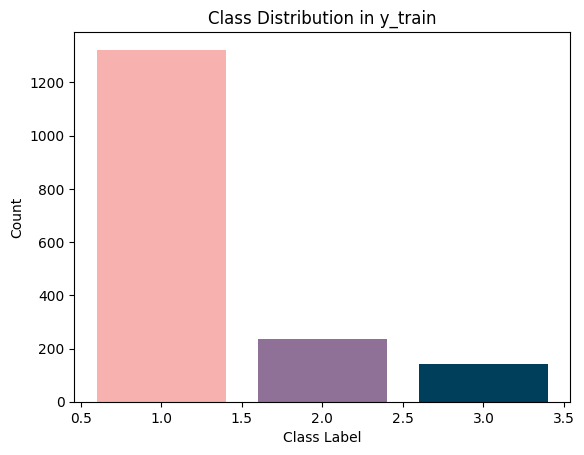

In [ ]:
unique_classes, class_counts = np.unique(y_train, return_counts=True)
colours=["#f7b2b0","#8f7198", "#003f5c"]
plt.bar(unique_classes, class_counts, color=colours)

plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution in y_train')

plt.show()

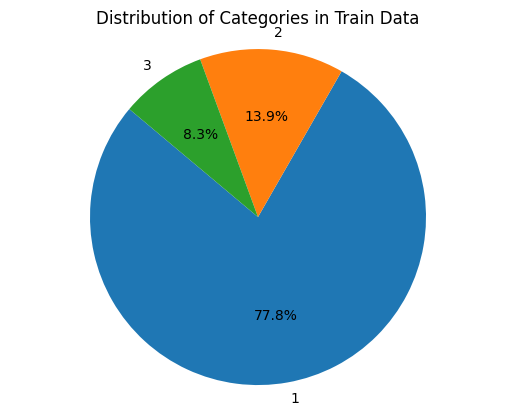

In [ ]:
category_counts = y_train.value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Categories in Train Data')
plt.show()

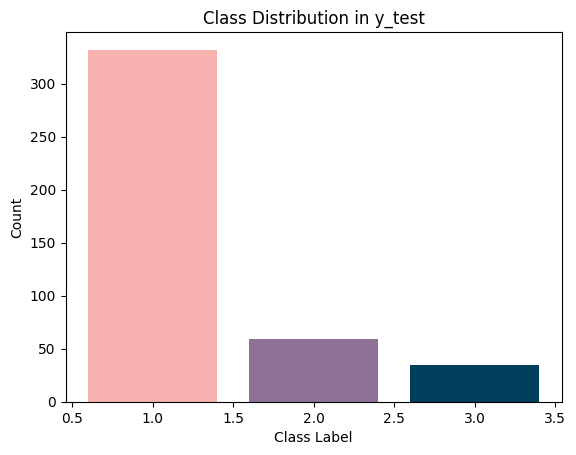

In [ ]:
unique_classes, class_counts = np.unique(y_test, return_counts=True)
colours=["#f7b2b0","#8f7198", "#003f5c"]
plt.bar(unique_classes, class_counts, color=colours)

plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution in y_test')

plt.show()

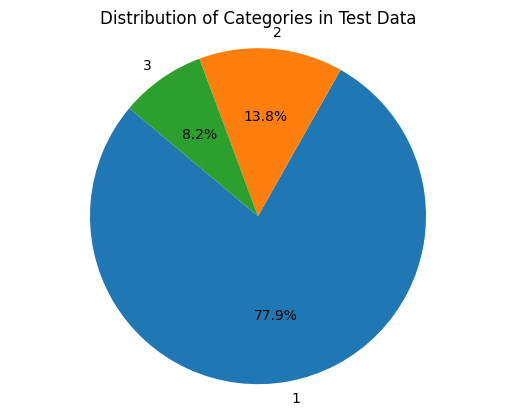

In [ ]:
category_counts = y_test.value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Categories in Test Data')
plt.show()

# Descriptive Analysis

In [ ]:
train = pd.concat([pd.DataFrame(X_train), pd.Series(y_train, name='fetal_health')], axis=1)

In [ ]:
summary_stats = train.groupby('fetal_health').describe().T
summary_stats.round(2)

fetal_health                    1       2       3
baseline value     count  1323.00  236.00  141.00
                   mean    131.83  141.18  131.37
                   std       9.48    7.70    9.18
                   min     106.00  120.00  110.00
                   25%     125.00  137.00  128.00
...                           ...     ...     ...
histogram_tendency min      -1.00   -1.00   -1.00
                   25%       0.00    0.00   -1.00
                   50%       0.00    0.00    0.00
                   75%       1.00    1.00    0.00
                   max       1.00    1.00    1.00

[168 rows x 3 columns]

In [ ]:
'''
sns.histplot(data=train, x='baseline value', hue='fetal_health', kde=True, bins=40, palette = 'tab10')
plt.show()
'''

"\nsns.histplot(data=train, x='baseline value', hue='fetal_health', kde=True, bins=40, palette = 'tab10')\nplt.show()\n"

In [ ]:
train.severe_decelerations.value_counts()

0.000    1695
0.001       5
Name: severe_decelerations, dtype: int64

In [ ]:
train.histogram_tendency.value_counts()

 0    897
 1    673
-1    130
Name: histogram_tendency, dtype: int64

In [ ]:
X_train.drop('severe_decelerations', axis = 1, inplace = True)

In [ ]:
train.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
cts_variables = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance']

kruskal_results = {}

for variable in cts_variables:
    groups = [train[variable][train['fetal_health'] == group] for group in train['fetal_health'].unique()]
    h_statistic, p_value = kruskal(*groups)
    kruskal_results[variable] = {'H-statistic': round(h_statistic, 3)}
    print(f"Kruskal-Wallis Test for {variable}:")
    print(f"H-statistic: {round(h_statistic, 3)}, p-value: {round(p_value, 3)}")
    print("\n")

Kruskal-Wallis Test for baseline value:
H-statistic: 195.277, p-value: 0.0


Kruskal-Wallis Test for accelerations:
H-statistic: 367.32, p-value: 0.0


Kruskal-Wallis Test for fetal_movement:
H-statistic: 25.519, p-value: 0.0


Kruskal-Wallis Test for uterine_contractions:
H-statistic: 148.057, p-value: 0.0


Kruskal-Wallis Test for light_decelerations:
H-statistic: 93.051, p-value: 0.0


Kruskal-Wallis Test for prolongued_decelerations:
H-statistic: 479.675, p-value: 0.0


Kruskal-Wallis Test for abnormal_short_term_variability:
H-statistic: 448.171, p-value: 0.0


Kruskal-Wallis Test for mean_value_of_short_term_variability:
H-statistic: 327.602, p-value: 0.0


Kruskal-Wallis Test for percentage_of_time_with_abnormal_long_term_variability:
H-statistic: 402.653, p-value: 0.0


Kruskal-Wallis Test for mean_value_of_long_term_variability:
H-statistic: 138.014, p-value: 0.0


Kruskal-Wallis Test for histogram_width:
H-statistic: 107.015, p-value: 0.0


Kruskal-Wallis Test for histogram_m

In [ ]:
kruskal_results

{'baseline value': {'H-statistic': 195.277},
 'accelerations': {'H-statistic': 367.32},
 'fetal_movement': {'H-statistic': 25.519},
 'uterine_contractions': {'H-statistic': 148.057},
 'light_decelerations': {'H-statistic': 93.051},
 'prolongued_decelerations': {'H-statistic': 479.675},
 'abnormal_short_term_variability': {'H-statistic': 448.171},
 'mean_value_of_short_term_variability': {'H-statistic': 327.602},
 'percentage_of_time_with_abnormal_long_term_variability': {'H-statistic': 402.653},
 'mean_value_of_long_term_variability': {'H-statistic': 138.014},
 'histogram_width': {'H-statistic': 107.015},
 'histogram_min': {'H-statistic': 133.599},
 'histogram_max': {'H-statistic': 9.566},
 'histogram_number_of_peaks': {'H-statistic': 32.265},
 'histogram_number_of_zeroes': {'H-statistic': 9.505},
 'histogram_mode': {'H-statistic': 219.603},
 'histogram_mean': {'H-statistic': 253.041},
 'histogram_median': {'H-statistic': 242.722},
 'histogram_variance': {'H-statistic': 195.469}}

In [ ]:
variable_names = list(kruskal_results.keys())
h_statistics = [result['H-statistic'] for result in kruskal_results.values()]

# Create a DataFrame
df = pd.DataFrame({'Variable': variable_names, 'H-statistic': h_statistics})
df.set_index('Variable', inplace=True)
# Sort the DataFrame based on H-statistic values in descending order
df = df.sort_values(by='H-statistic', ascending=False)

In [ ]:
Num_feature = df["H-statistic"].to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

A higher H-statistic suggests greater variability or differences among the groups.
It indicates that at least one group is different from the others in terms of the variable being tested.

A lower H-statistic suggests less variability or similarity among the groups.
It indicates that the groups are more similar in terms of the variable being tested.

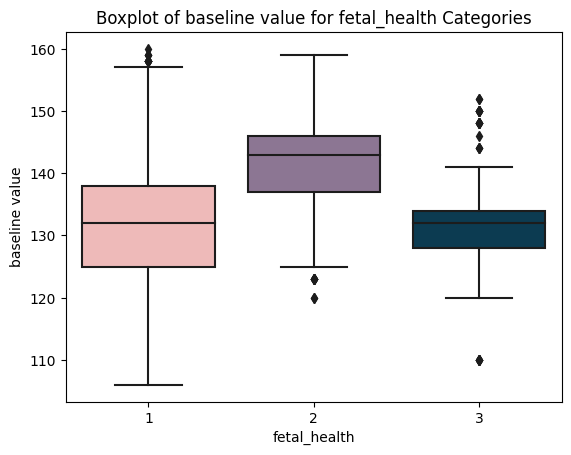

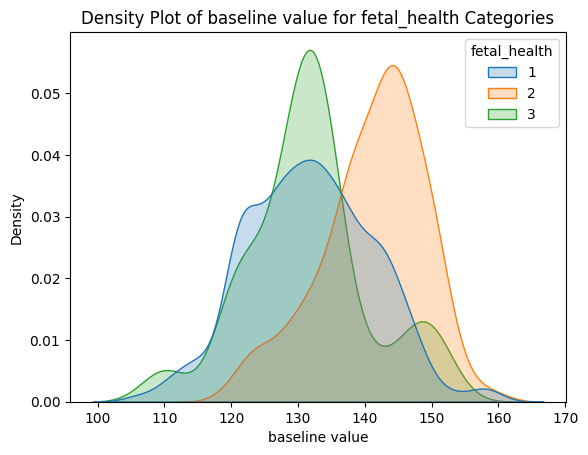

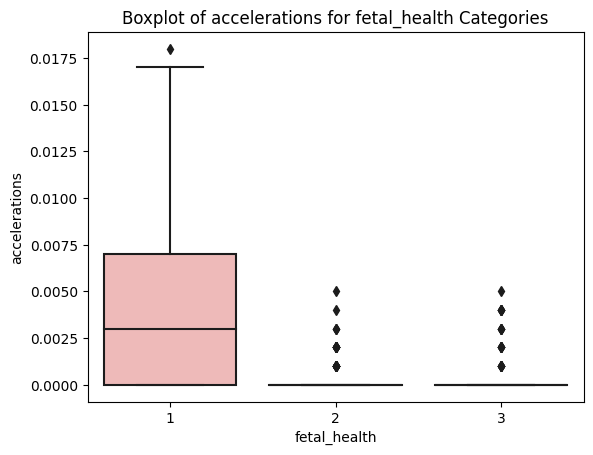

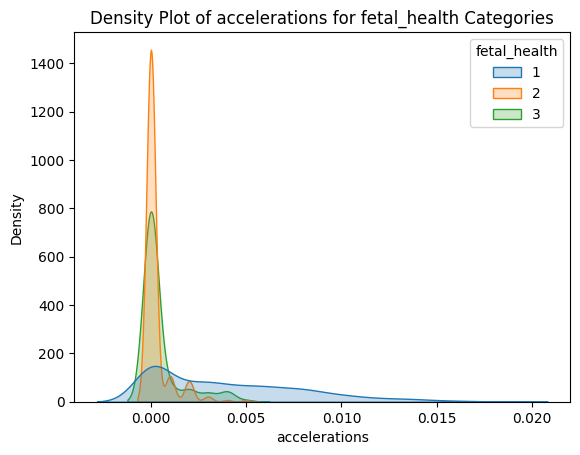

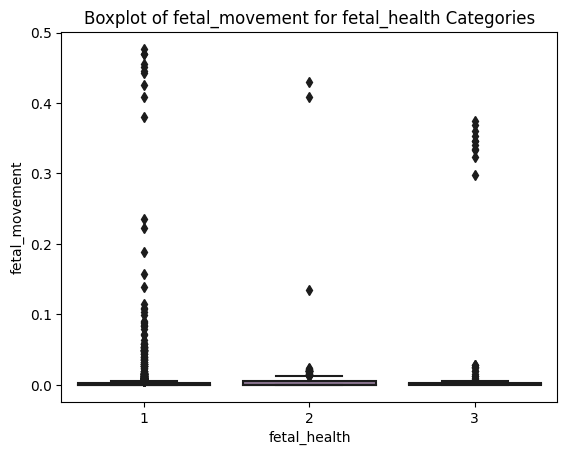

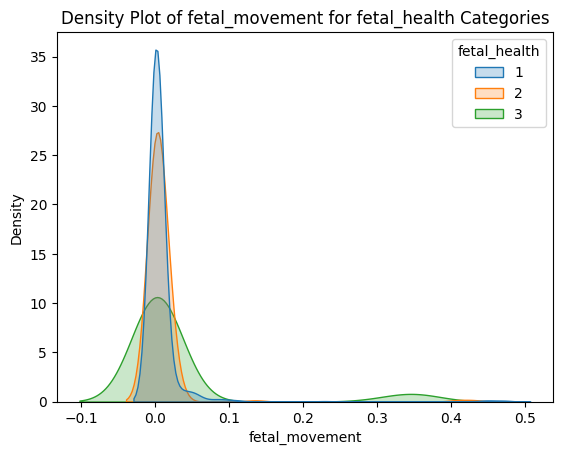

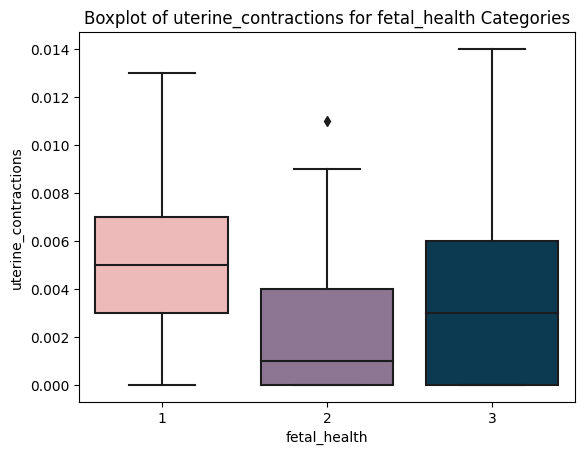

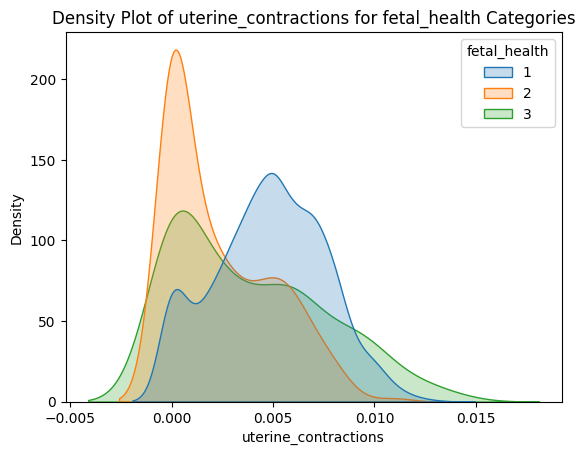

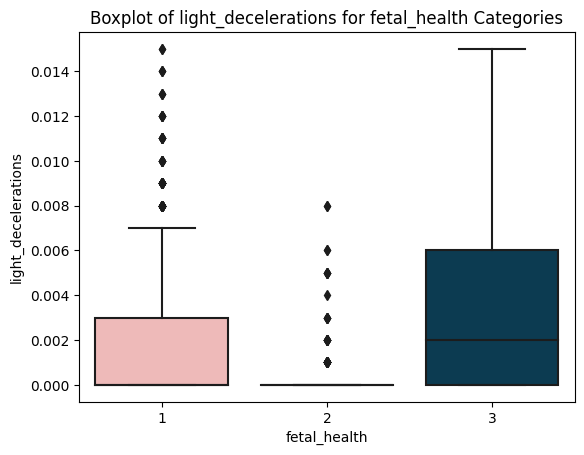

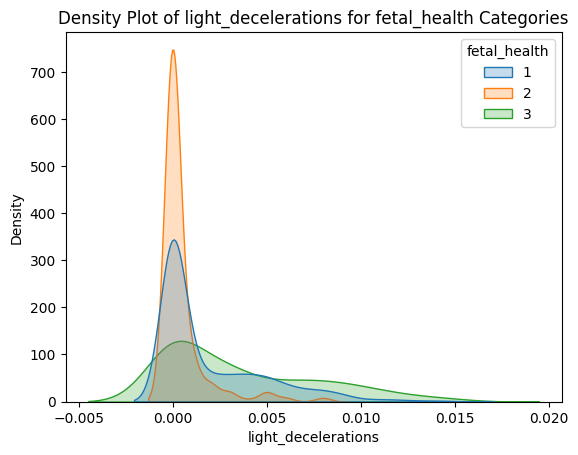

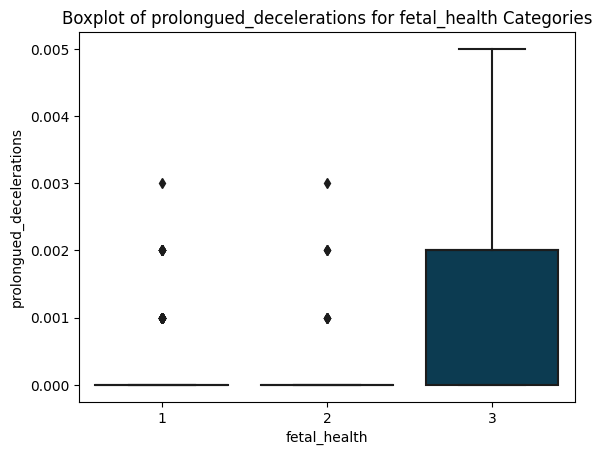

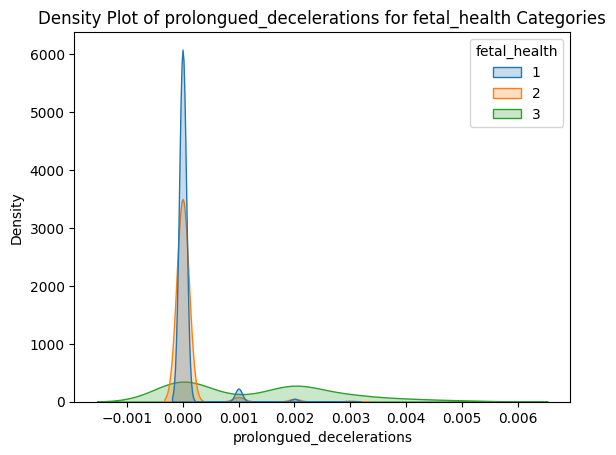

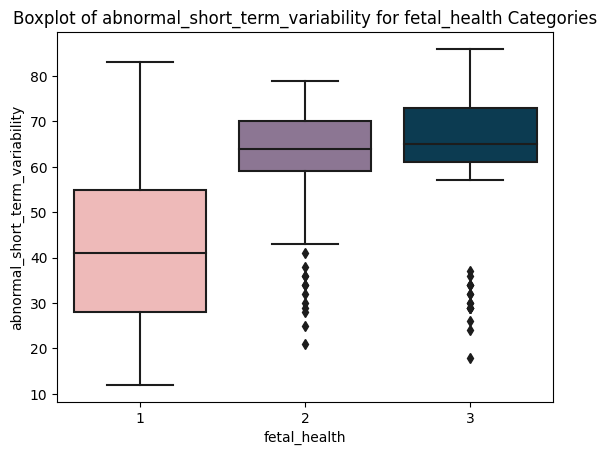

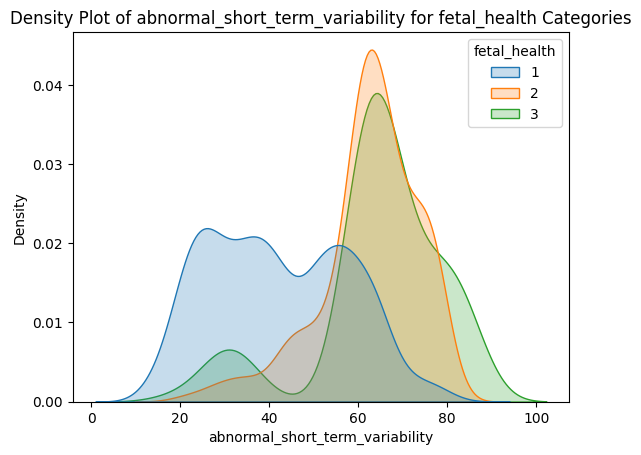

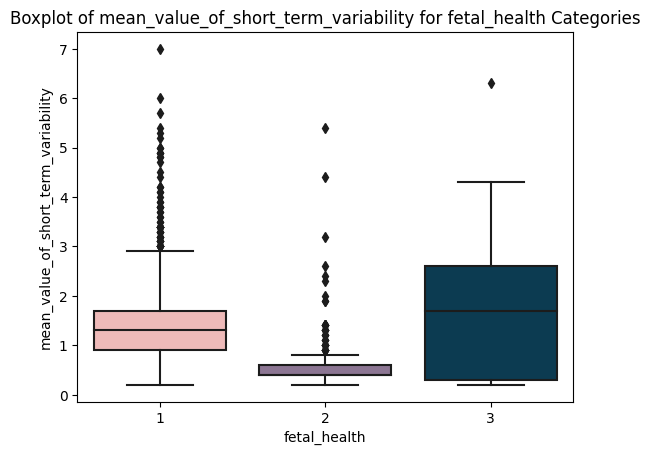

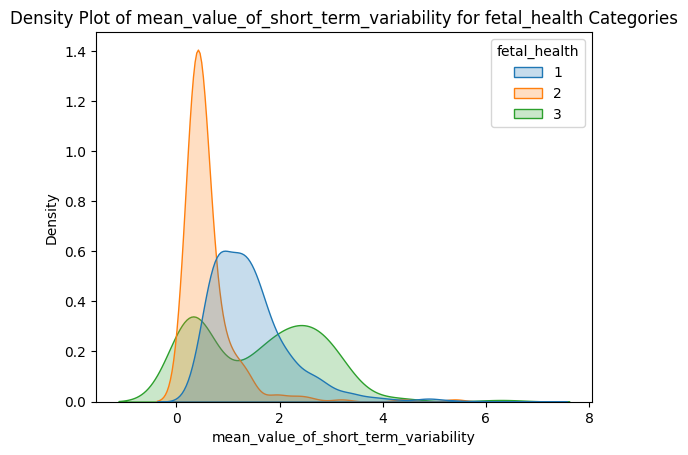

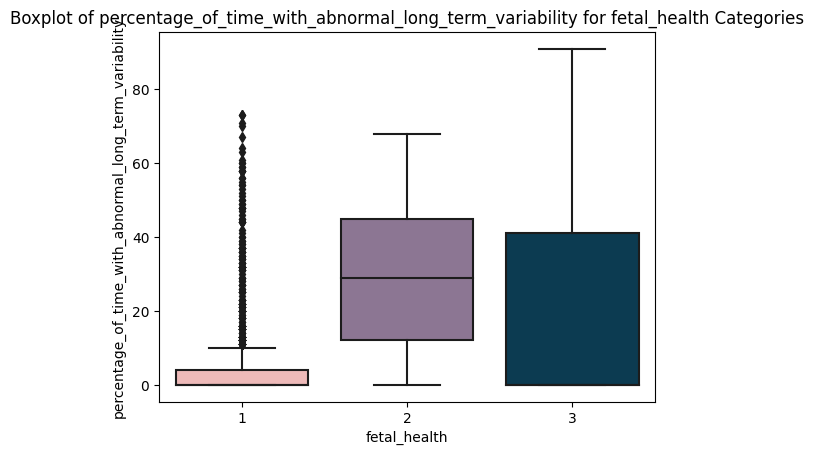

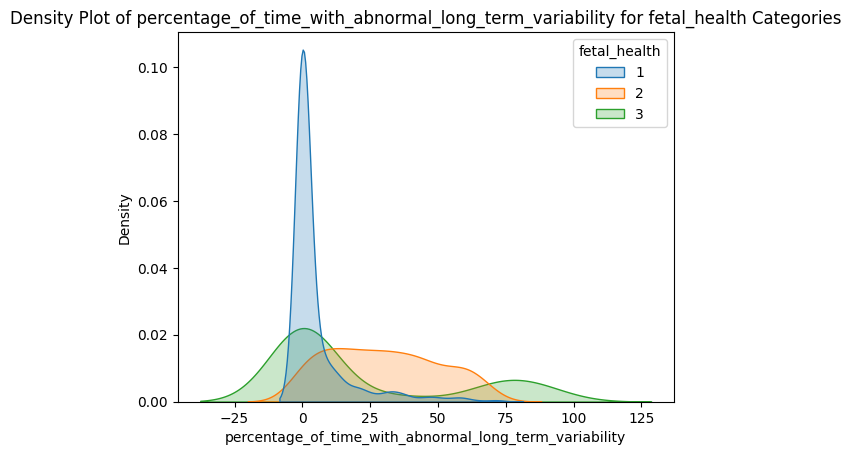

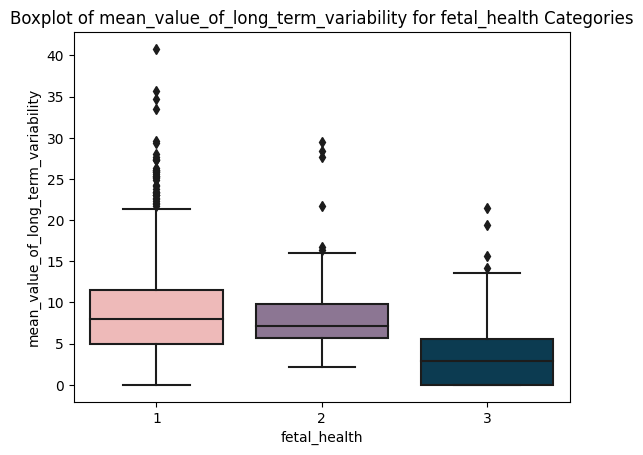

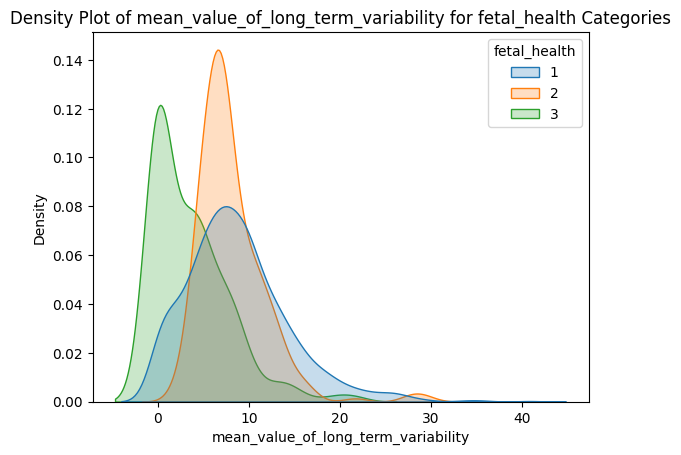

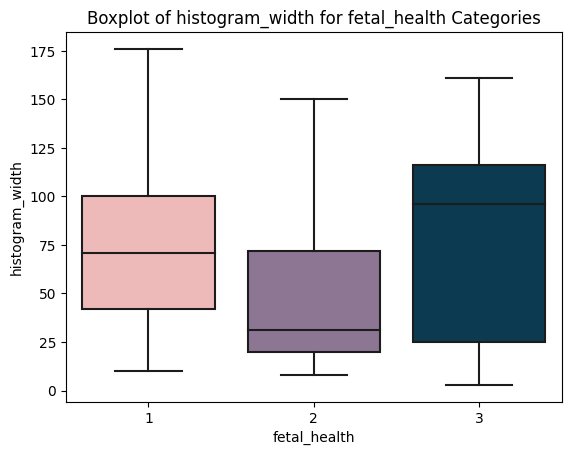

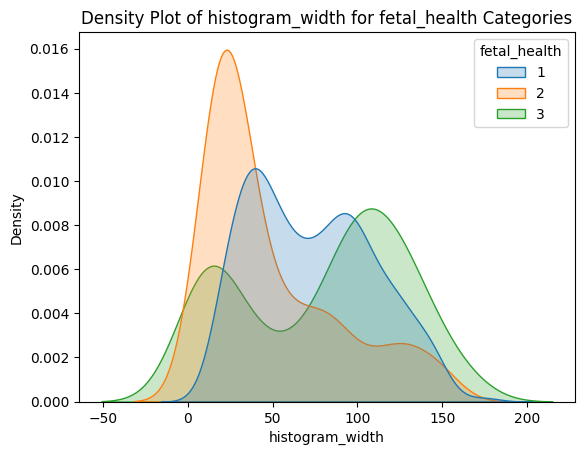

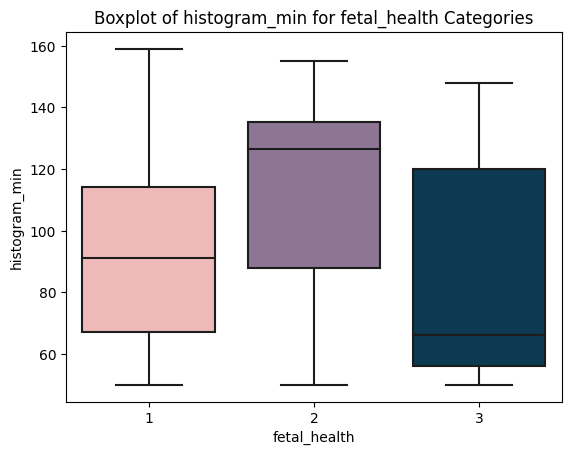

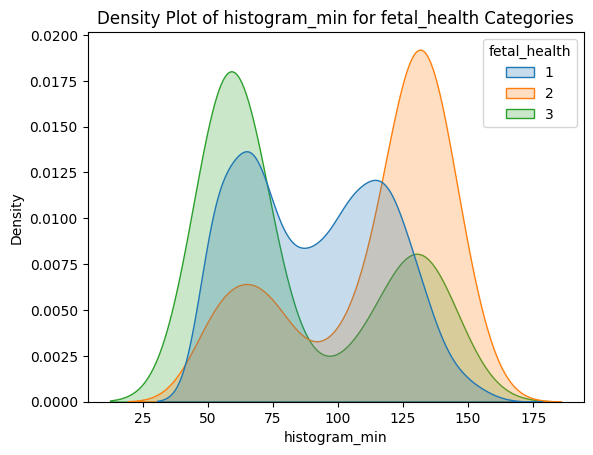

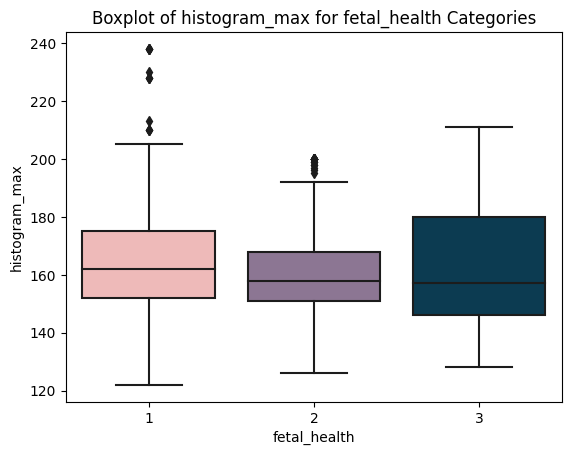

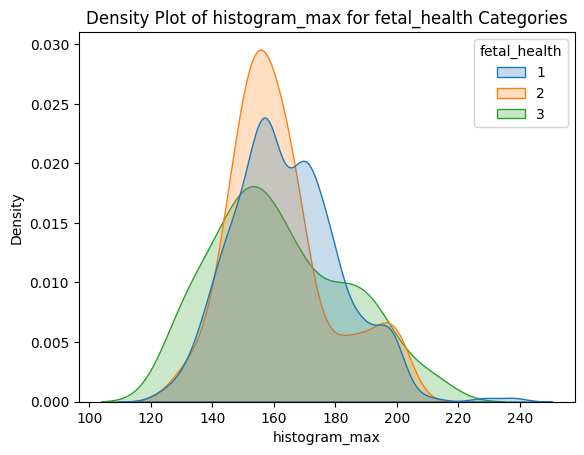

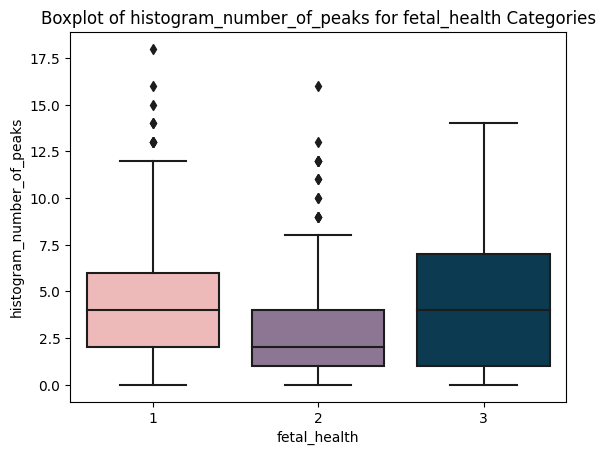

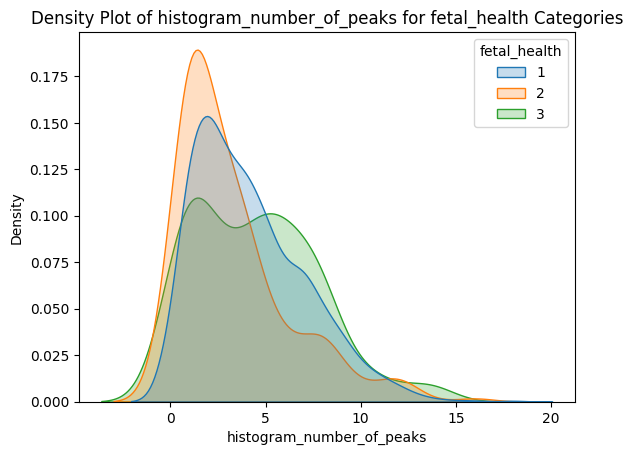

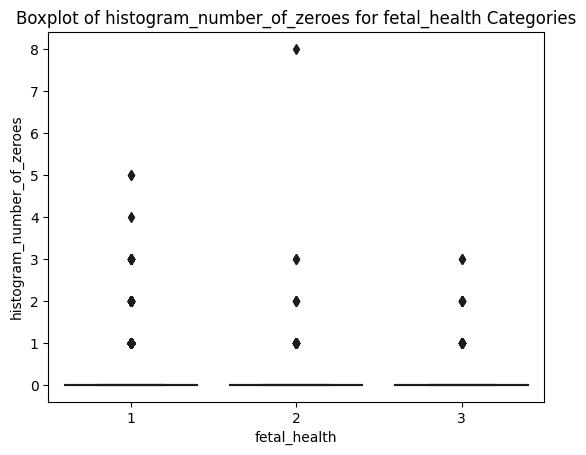

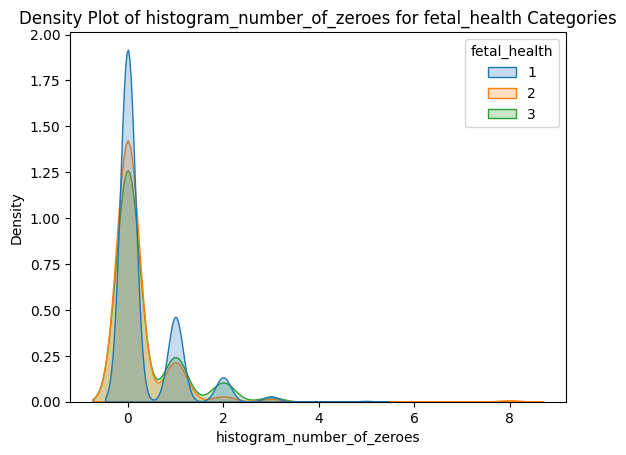

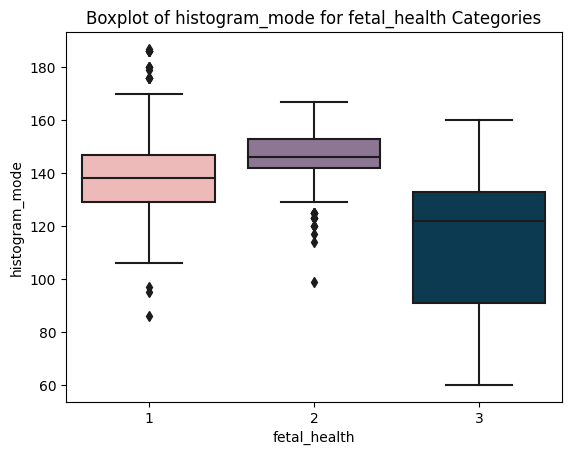

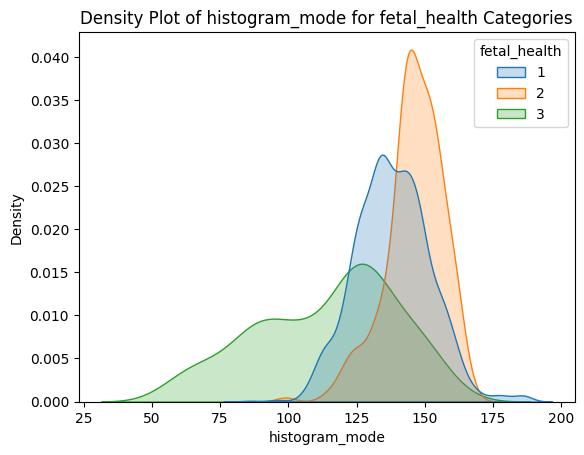

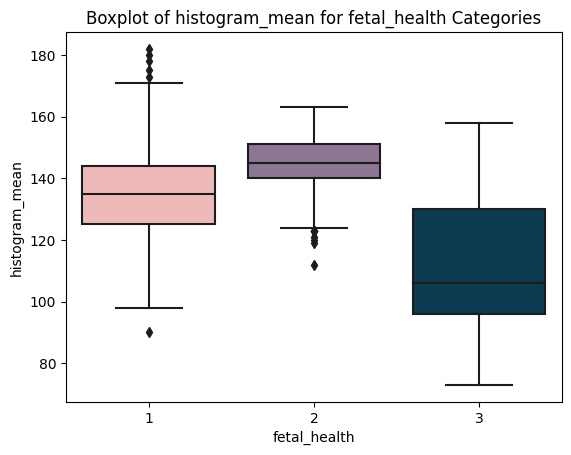

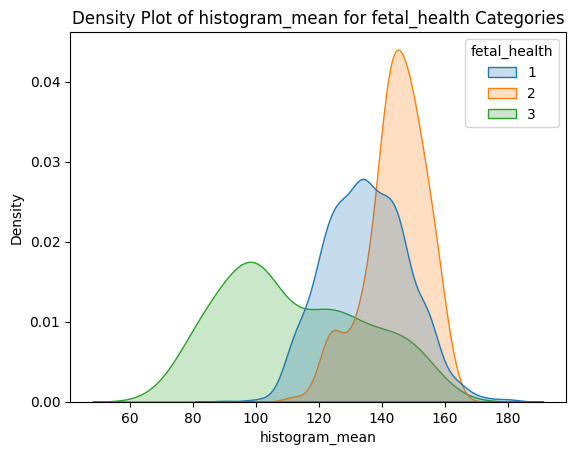

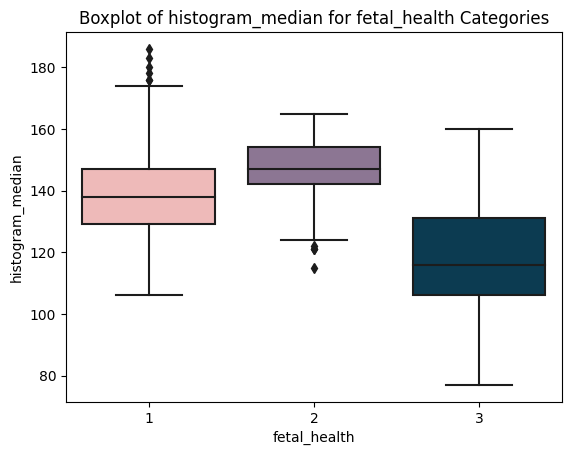

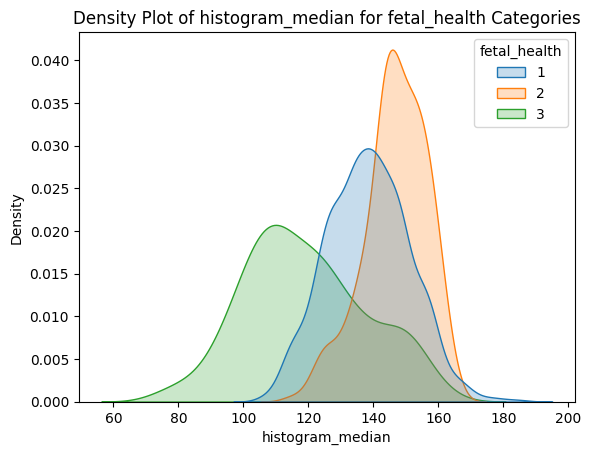

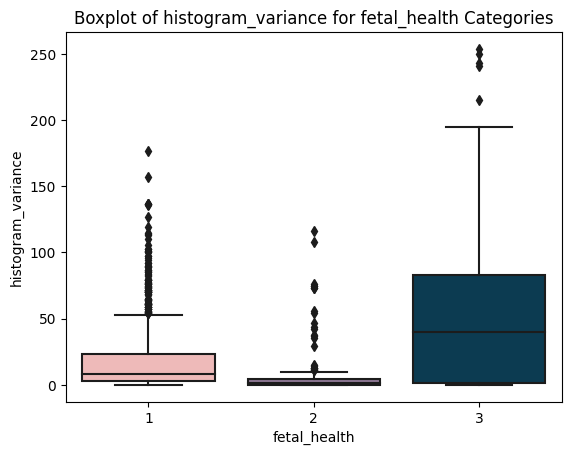

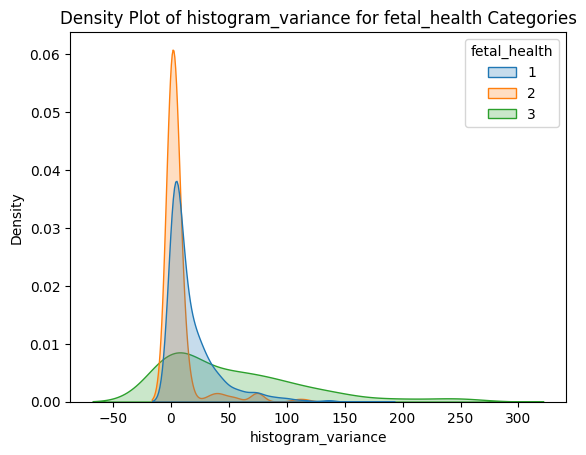

In [ ]:
for variable in cts_variables:
  sns.boxplot(x='fetal_health', y=variable, data=train, palette = colours)
  plt.title(f"Boxplot of {variable} for fetal_health Categories")
  plt.ylabel(f"{variable}")
  plt.show()

  sns.kdeplot(x=variable, hue='fetal_health', data=train, common_norm=False,
              fill=True, palette = 'tab10')
  plt.title(f"Density Plot of {variable} for fetal_health Categories")
  plt.xlabel(f"{variable}")
  plt.show()

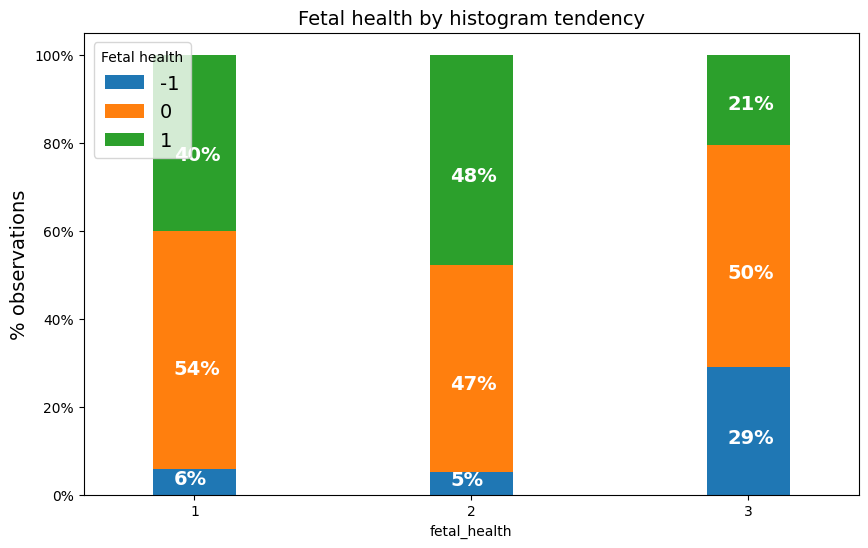

In [ ]:
df = train.groupby(['fetal_health', 'histogram_tendency']).size().unstack()

ax = (df.T*100.0 / df.T.sum()).T.plot(kind='bar',
                                      width = 0.3,
                                      stacked = True,
                                      rot = 0,
                                      figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Fetal health')
ax.set_ylabel('% observations',size = 14)
ax.set_title('Fetal health by histogram tendency',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

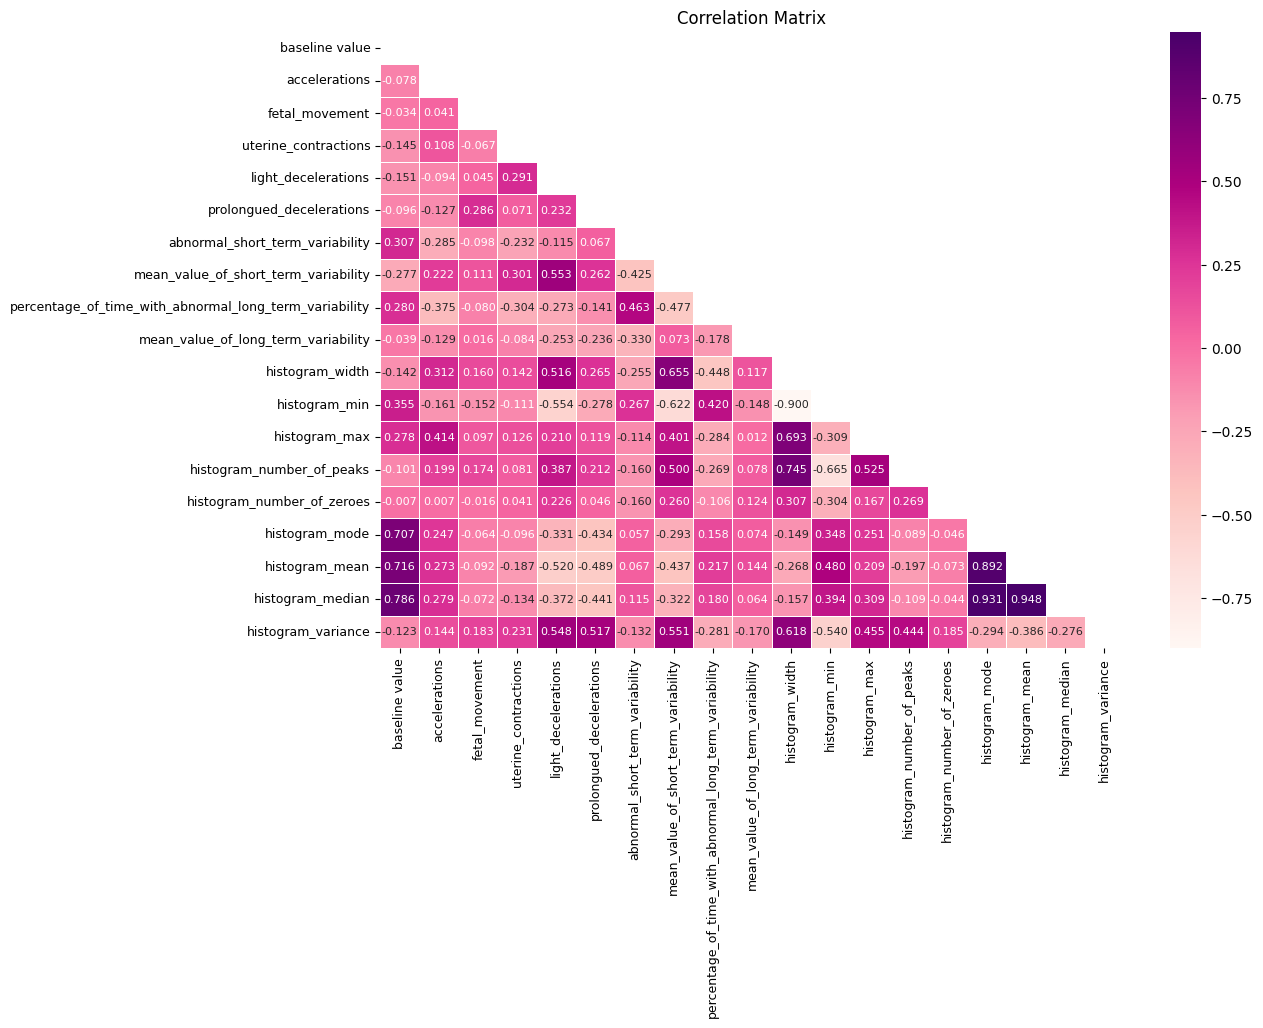

In [ ]:
plt.figure(figsize = (12,8))
x = X_train.drop(['histogram_tendency'], axis = 1)
corr = x.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='RdPu', linewidths=0.5, fmt=".3f", annot_kws={'fontsize': 8})
cormat.set_xticklabels(cormat.get_xticklabels(), color='black', fontsize=9)
cormat.set_yticklabels(cormat.get_yticklabels(), color='black', fontsize=9)
cormat.set_title('Correlation Matrix')
plt.show()

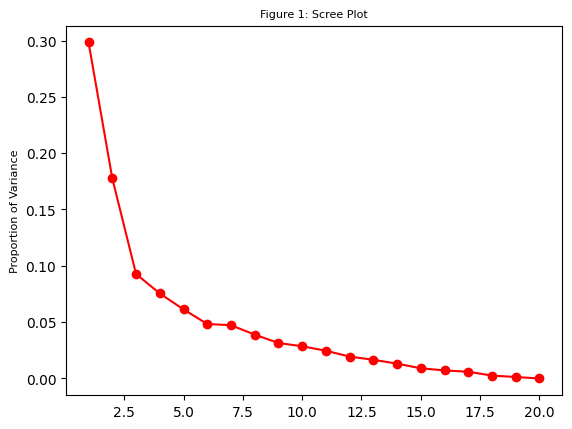

In [ ]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=20)
pca.fit_transform(x_scaled)

prop_var = pca.explained_variance_ratio_
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.29825558, 0.47588368, 0.56863132, 0.64413527, 0.70544624,
       0.75382152, 0.80110827, 0.84005975, 0.87155111, 0.90012649,
       0.92476361, 0.94419964, 0.96077994, 0.97394365, 0.98297965,
       0.99011532, 0.99610064, 0.99868866, 1.        , 1.        ])

In [ ]:
pca = PCA(n_components=8)
pca_features = pca.fit_transform(x_scaled)

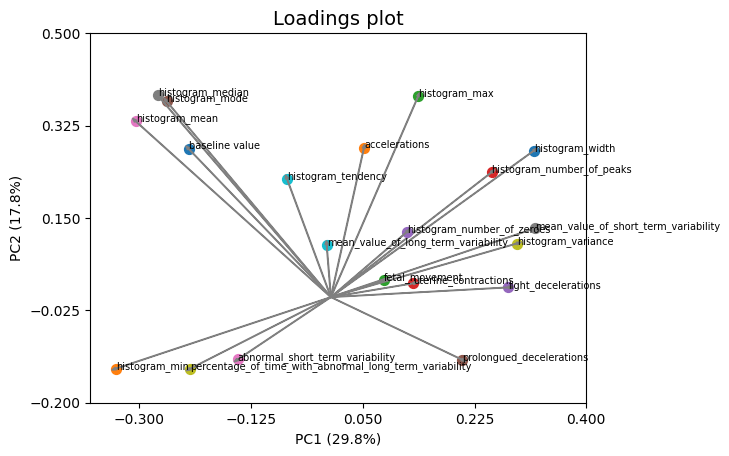

In [ ]:
loadings = pca.components_
feature_names = X_train.columns

# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]

# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=50)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='grey',
        head_width=0.005
        )
    plt.text(xs[i], ys[i], varnames, fontsize = 7)

# Define the axes
xticks = np.linspace(-0.3, 0.4, num=5)
yticks = np.linspace(-0.2, 0.5, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')

plt.title('Loadings plot', fontsize = 14)
plt.show()

# Advanced Analysis


In [ ]:
dummy_df = pd.get_dummies(X_train, columns = ['histogram_tendency'], drop_first = True)
cts = dummy_df.drop(['histogram_tendency_0', 'histogram_tendency_1'], axis = 1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(cts)
cts = pd.DataFrame(X_train_scaled, columns = cts.columns).reset_index()
dd = dummy_df[['histogram_tendency_0', 'histogram_tendency_1']].reset_index()

In [ ]:
X_train_scaled = pd.concat([cts, dd], axis = 1)
X_train_scaled.drop('index', 1, inplace = True)
#X_train_scaled

In [ ]:
X_test.drop(['severe_decelerations'], axis = 1, inplace = True)
dummy_df = pd.get_dummies(X_test, columns = ['histogram_tendency'], drop_first = True)
cts = dummy_df.drop(['histogram_tendency_0', 'histogram_tendency_1'], axis = 1)

X_test_scaled = scaler.fit_transform(cts)
cts = pd.DataFrame(X_test_scaled, columns = cts.columns).reset_index()
dd = dummy_df[['histogram_tendency_0', 'histogram_tendency_1']].reset_index()

X_test_scaled = pd.concat([cts, dd], axis = 1)
X_test_scaled.drop('index', 1, inplace = True)
#X_test_scaled

In [ ]:
pipeline_lr = Pipeline([('lr_classifier',LogisticRegression(multi_class = 'multinomial', solver = 'sag', max_iter = 5000))])

pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])

pipeline_gbcl = Pipeline([('gbcl_classifier',GradientBoostingClassifier())])

pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier(random_state = 42))])

pipeline_knn = Pipeline([('knn_classifier',KNeighborsClassifier())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_gbcl, pipeline_rf, pipeline_knn]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Gradient Boost', 3:'RandomForest', 4: 'KNN'}


# Fitting the pipelines
for pipe in pipelines:
    pipe.fit(X_train_scaled, y_train)

In [ ]:
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train_scaled,y_train, cv=5)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.899412 
Decision Tree: 0.920588 
Gradient Boost: 0.953529 
RandomForest: 0.939412 
KNN: 0.903529 


------------------------------------------------------
Logistic Regression: 0.904706 Train -
              precision    recall  f1-score   support

           1       0.95      0.96      0.95      1323
           2       0.69      0.69      0.69       236
           3       0.88      0.79      0.83       141

    accuracy                           0.90      1700
   macro avg       0.84      0.81      0.82      1700
weighted avg       0.90      0.90      0.90      1700

Logistic Regression: 0.892019 Test -
              precision    recall  f1-score   support

           1       0.94      0.96      0.95       332
           2       0.63      0.64      0.64        59
           3       0.92      0.69      0.79        35

    accuracy                           0.89       426
   macro avg       0.83      0.76      0.79       426
weighted avg       0.89      0.89      0.89       426



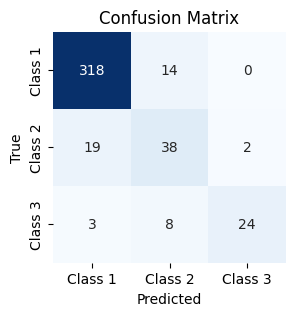

------------------------------------------------------
Decision Tree: 0.999412 Train -
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1323
           2       1.00      1.00      1.00       236
           3       1.00      1.00      1.00       141

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700

Decision Tree: 0.908451 Test -
              precision    recall  f1-score   support

           1       0.93      0.97      0.95       332
           2       0.82      0.63      0.71        59
           3       0.77      0.77      0.77        35

    accuracy                           0.91       426
   macro avg       0.84      0.79      0.81       426
weighted avg       0.90      0.91      0.90       426



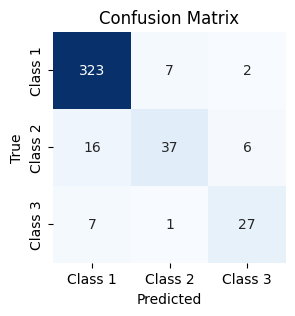

------------------------------------------------------
Gradient Boost: 0.993529 Train -
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      1323
           2       0.98      0.97      0.98       236
           3       1.00      0.99      1.00       141

    accuracy                           0.99      1700
   macro avg       0.99      0.99      0.99      1700
weighted avg       0.99      0.99      0.99      1700

Gradient Boost: 0.913146 Test -
              precision    recall  f1-score   support

           1       0.93      0.98      0.95       332
           2       0.82      0.56      0.67        59
           3       0.82      0.91      0.86        35

    accuracy                           0.91       426
   macro avg       0.86      0.82      0.83       426
weighted avg       0.91      0.91      0.91       426



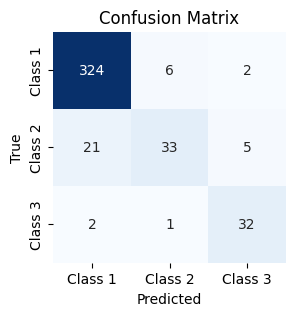

------------------------------------------------------
RandomForest: 0.999412 Train -
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1323
           2       1.00      1.00      1.00       236
           3       1.00      1.00      1.00       141

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700

RandomForest: 0.910798 Test -
              precision    recall  f1-score   support

           1       0.93      0.98      0.95       332
           2       0.77      0.58      0.66        59
           3       0.88      0.86      0.87        35

    accuracy                           0.91       426
   macro avg       0.86      0.80      0.83       426
weighted avg       0.91      0.91      0.91       426



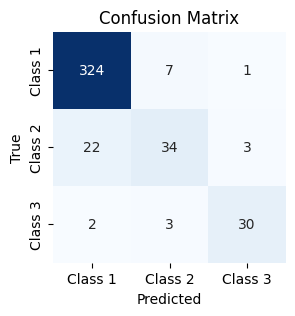

------------------------------------------------------
KNN: 0.938235 Train -
              precision    recall  f1-score   support

           1       0.95      0.98      0.97      1323
           2       0.84      0.76      0.80       236
           3       0.97      0.82      0.89       141

    accuracy                           0.94      1700
   macro avg       0.92      0.85      0.88      1700
weighted avg       0.94      0.94      0.94      1700

KNN: 0.880282 Test -
              precision    recall  f1-score   support

           1       0.90      0.97      0.94       332
           2       0.66      0.49      0.56        59
           3       0.92      0.66      0.77        35

    accuracy                           0.88       426
   macro avg       0.83      0.71      0.76       426
weighted avg       0.87      0.88      0.87       426



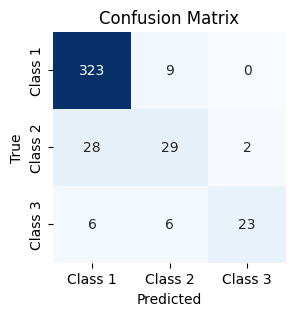

In [ ]:
for i, model in enumerate(pipelines):
  pred_test = model.predict(X_test_scaled)
  accuracy_test = accuracy_score(y_test, pred_test)
  pred_train = model.predict(X_train_scaled)
  accuracy_train = accuracy_score(y_train, pred_train)
  print(f"------------------------------------------------------")
  print("%s: %f Train -" % (pipe_dict[i], accuracy_train))
  print(classification_report(y_train, pred_train))
  print("%s: %f Test -" % (pipe_dict[i], accuracy_test))
  print(classification_report(y_test, pred_test))

  cm = confusion_matrix(y_test,pred_test)
  plt.figure(figsize=(3, 3))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Class 1', 'Class 2', 'Class 3'],
              yticklabels=['Class 1', 'Class 2', 'Class 3'])
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

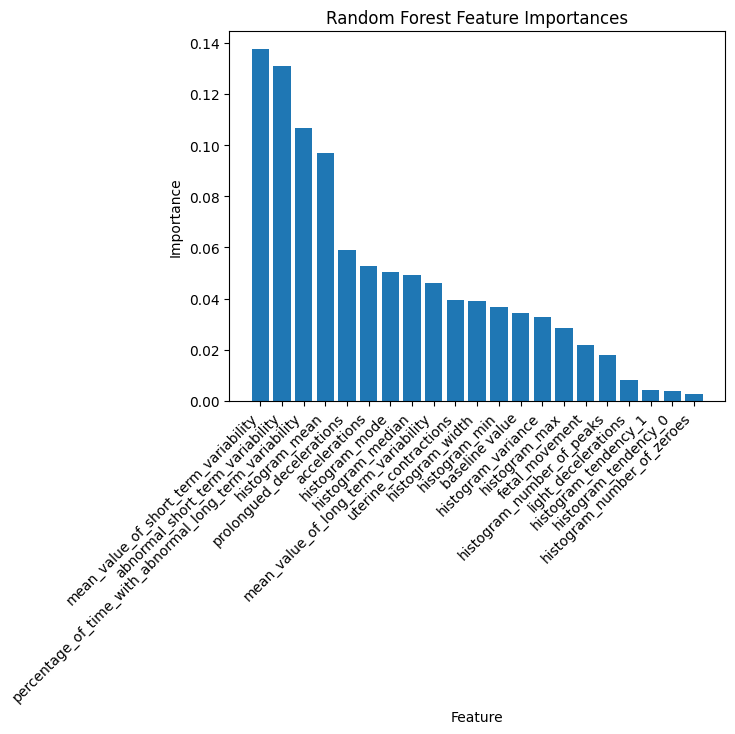

In [ ]:
feature_importances = pipelines[3][0].feature_importances_ # rf_model
indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[indices]
sorted_feature_names = np.array(dummy_df.columns)[indices]
# Visualize feature importances
plt.bar(range(X_train_scaled.shape[1]), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 2000x1500 with 0 Axes>

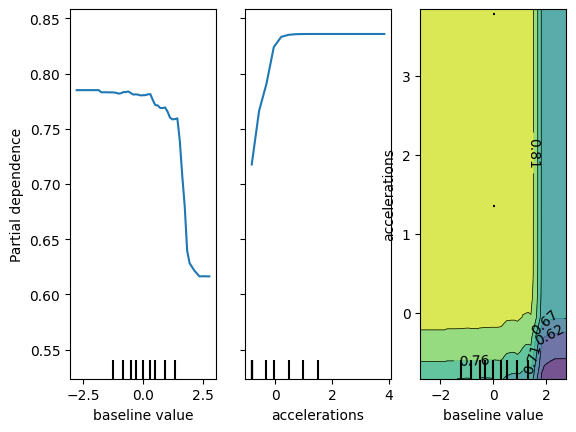

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features = [0, 1, (0, 1)]
plt.figure(figsize=(20, 15))
PartialDependenceDisplay.from_estimator(pipelines[3][0], X_train_scaled, features, target = 1)

<Figure size 2000x1500 with 0 Axes>

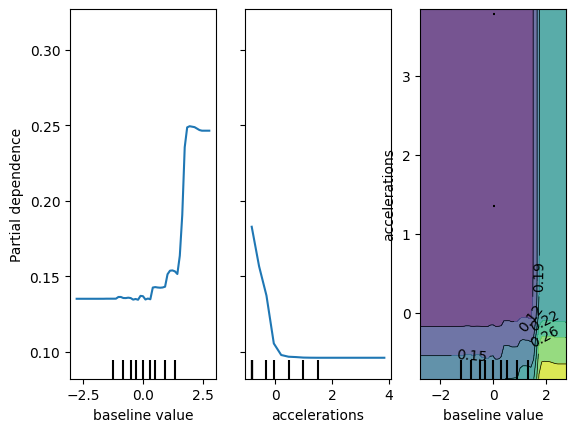

In [ ]:
features = [0, 1, (0, 1)]
plt.figure(figsize=(20, 15))
PartialDependenceDisplay.from_estimator(pipelines[3][0], X_train_scaled, features, target = 2)

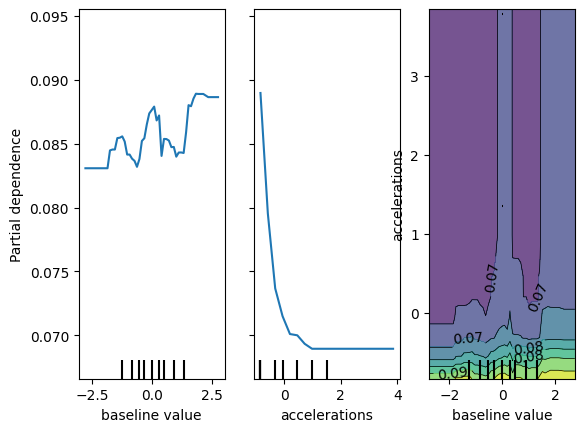

In [ ]:
PartialDependenceDisplay.from_estimator(pipelines[3][0], X_train_scaled, features, target = 3)

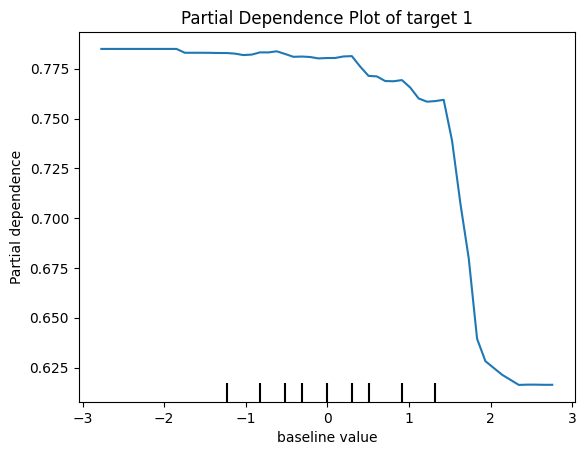

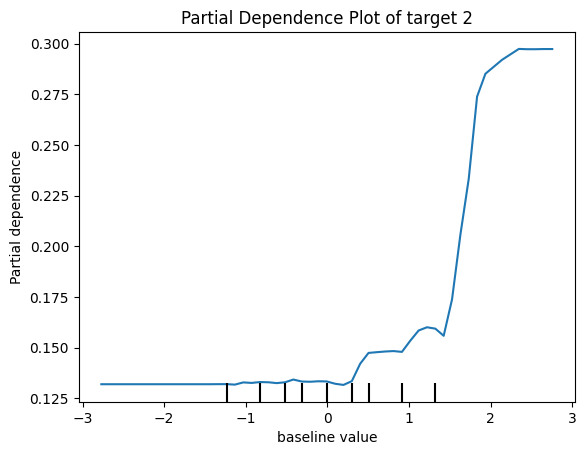

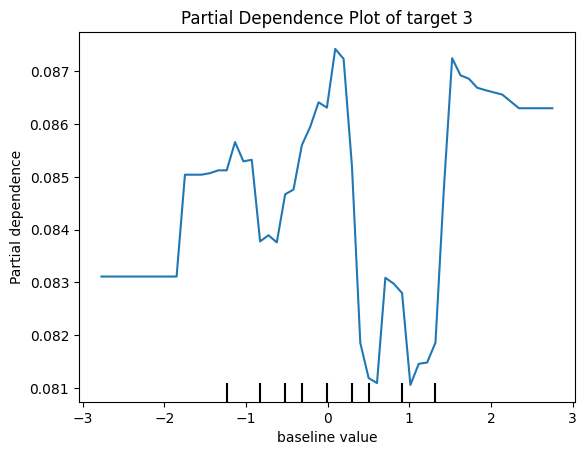

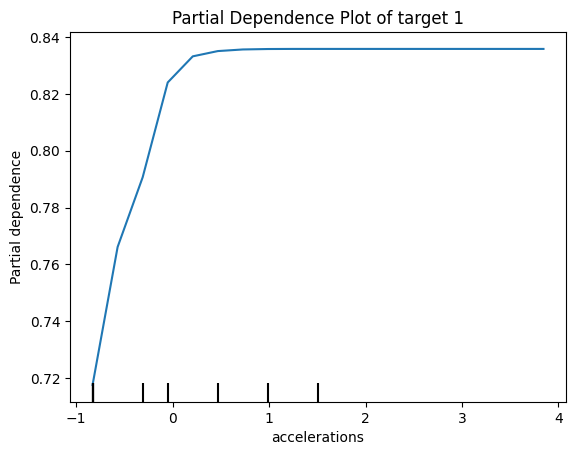

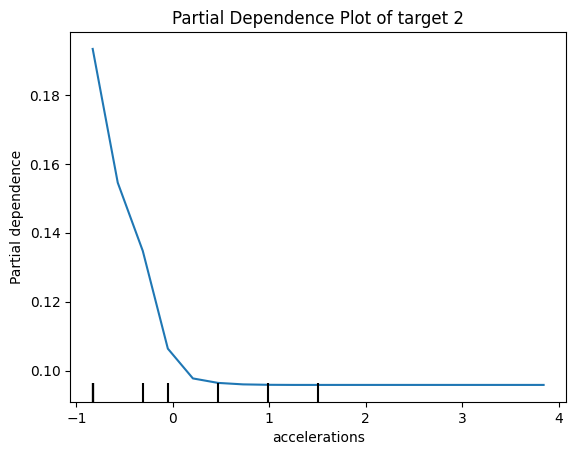

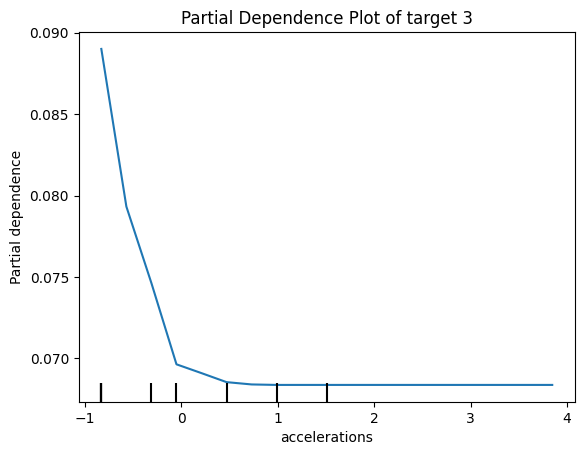

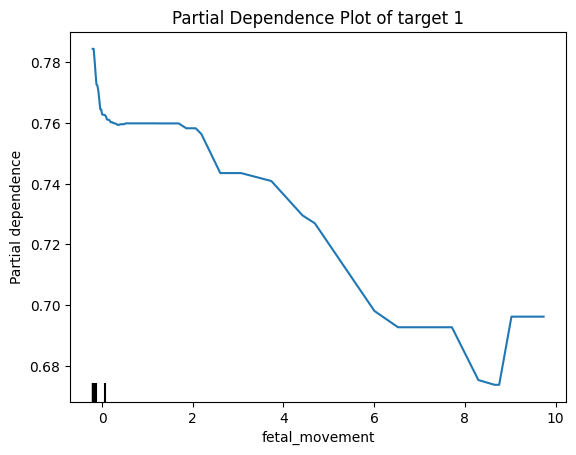

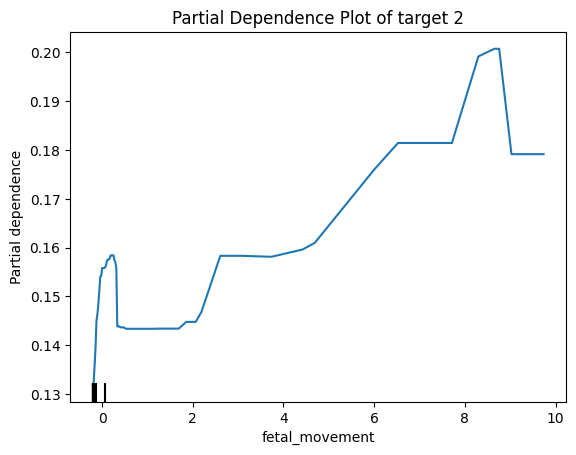

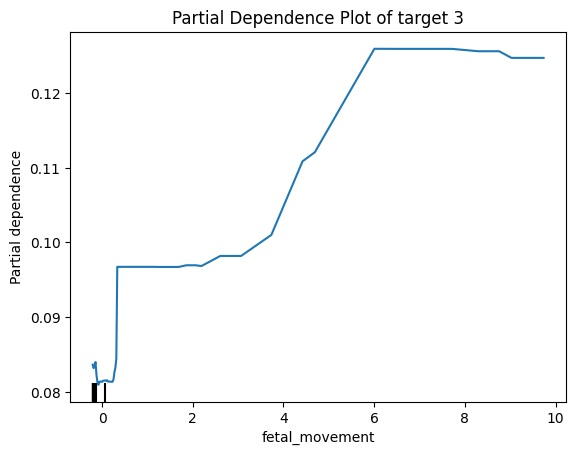

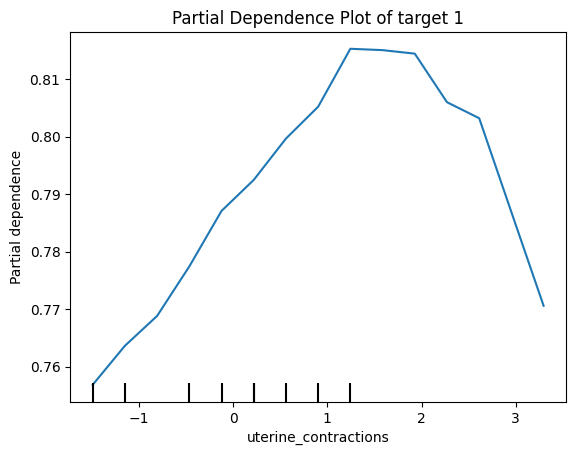

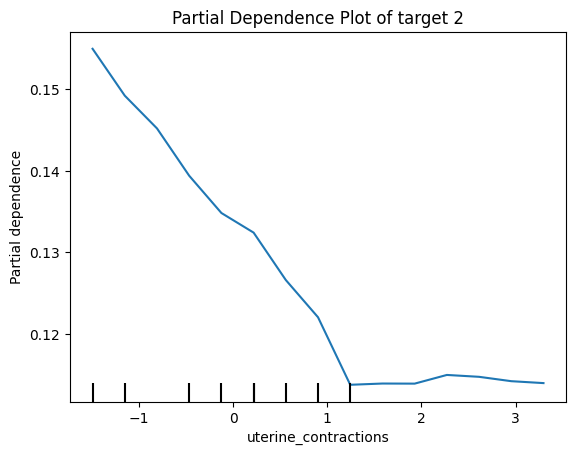

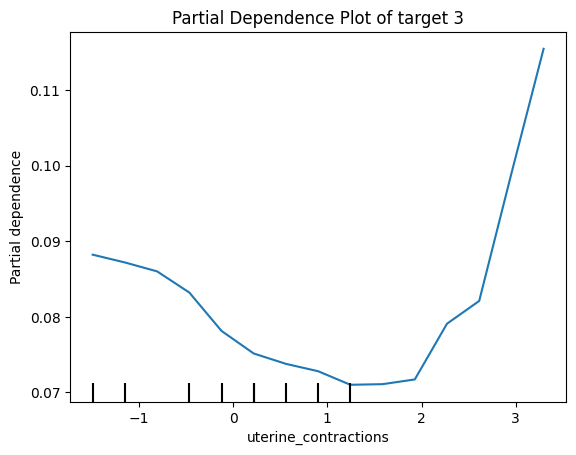

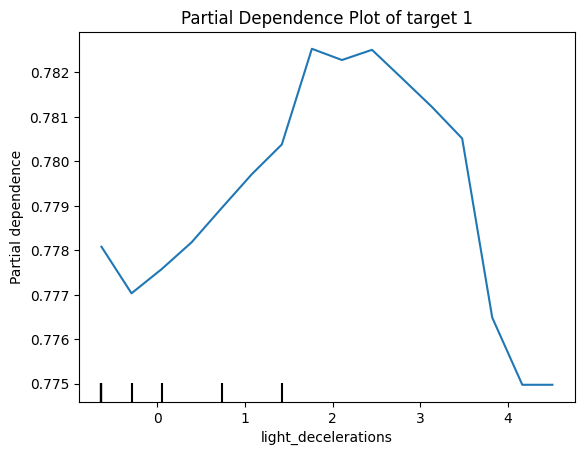

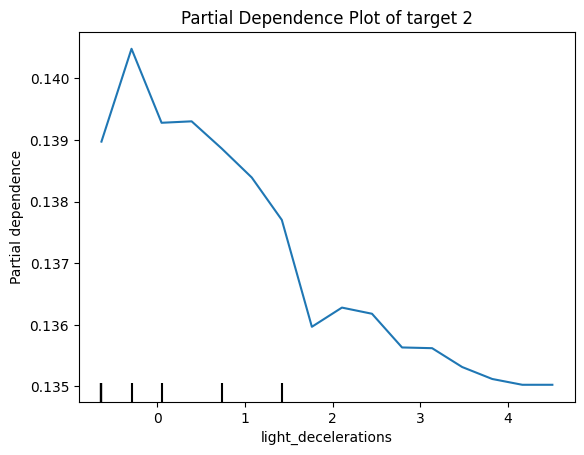

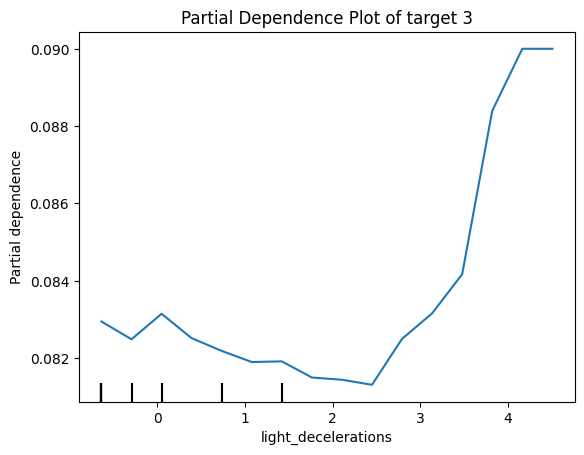

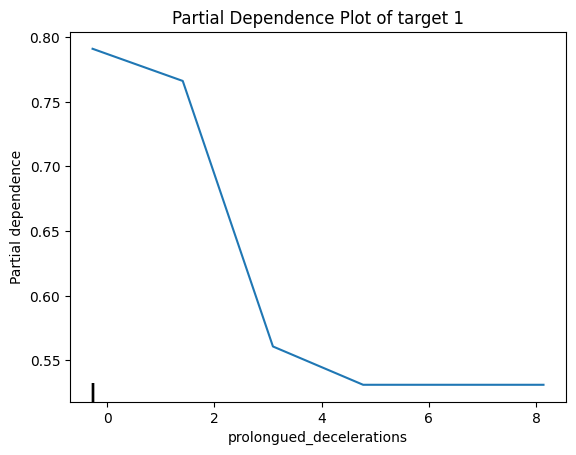

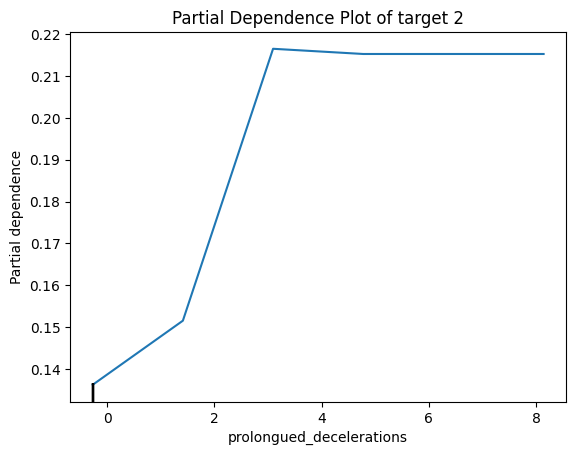

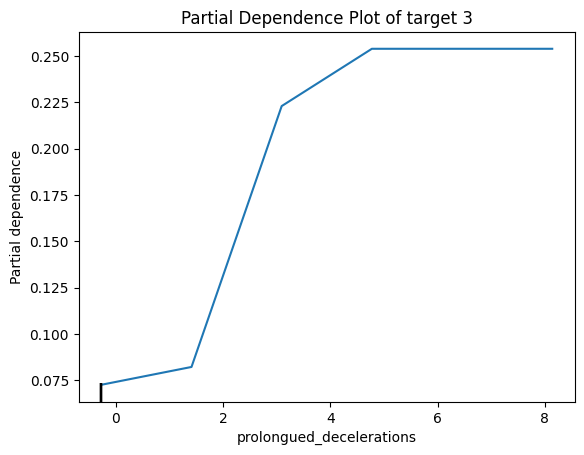

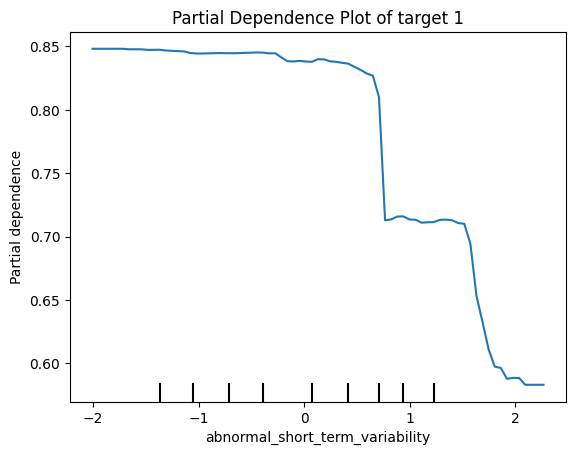

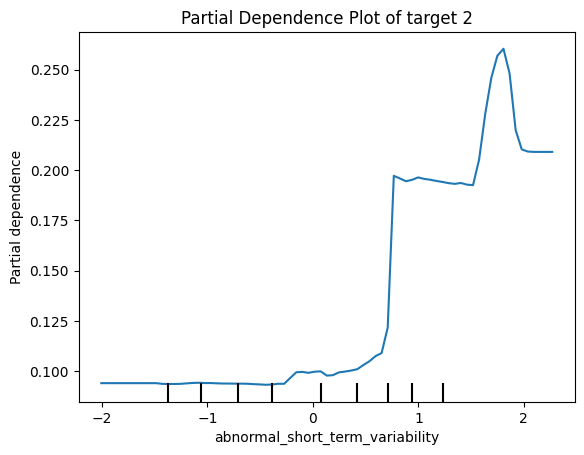

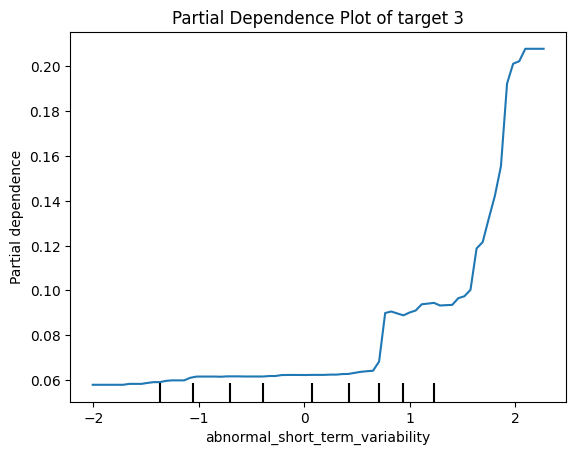

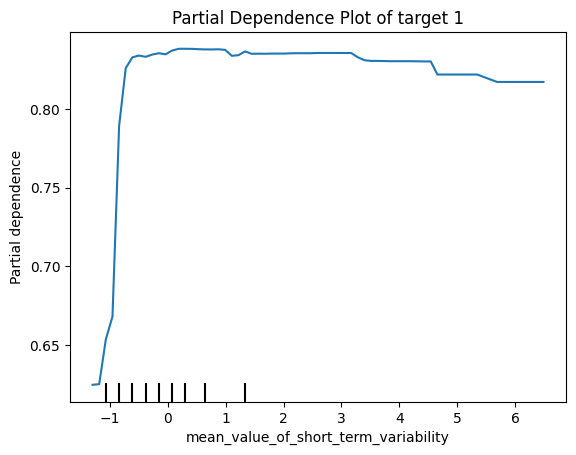

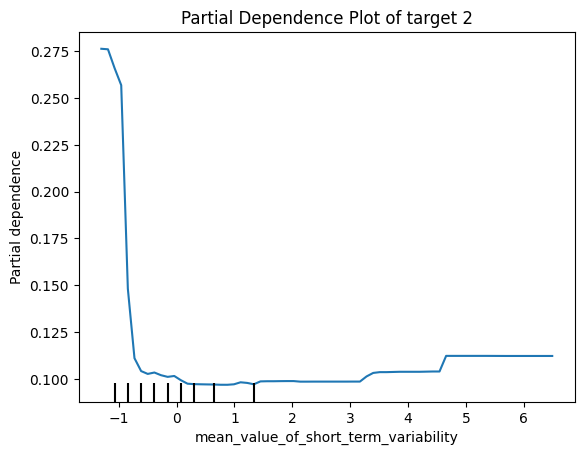

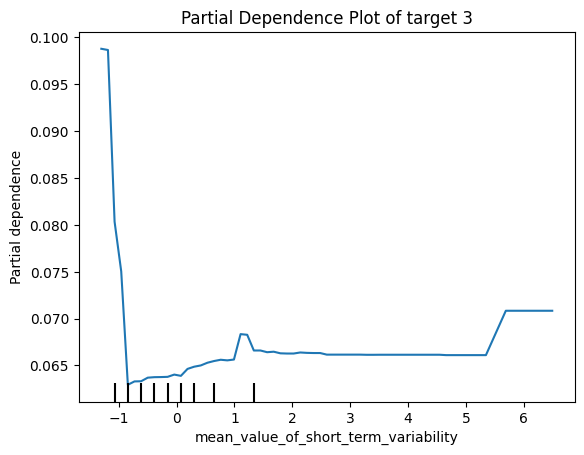

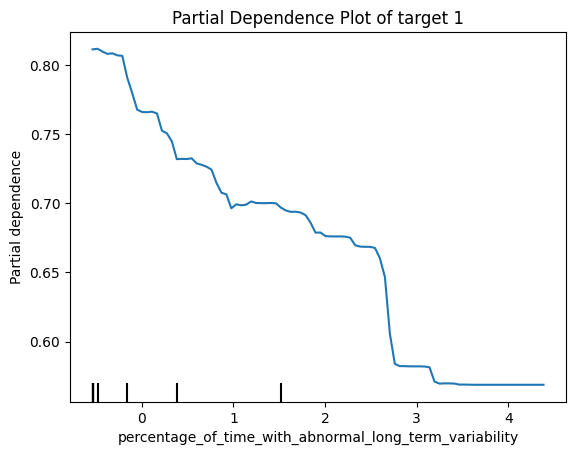

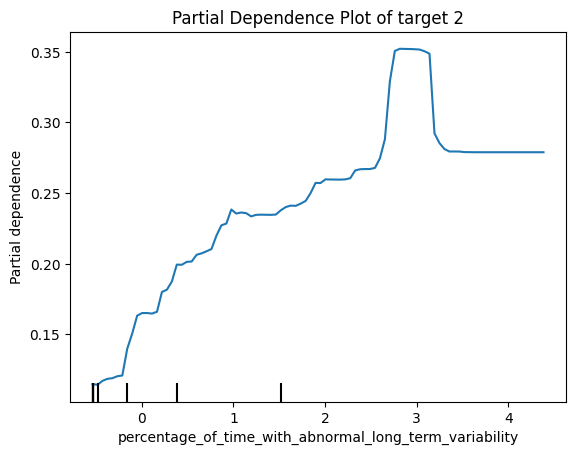

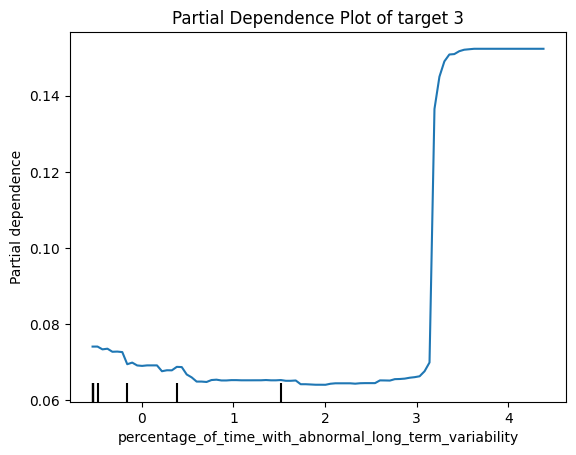

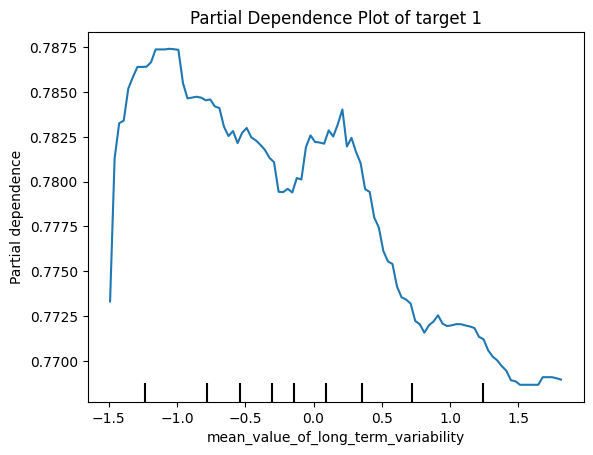

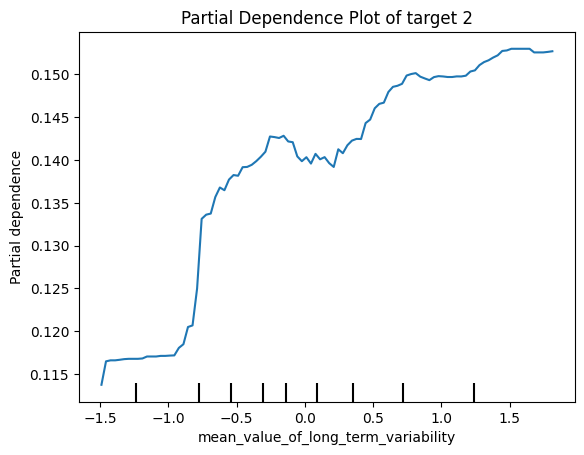

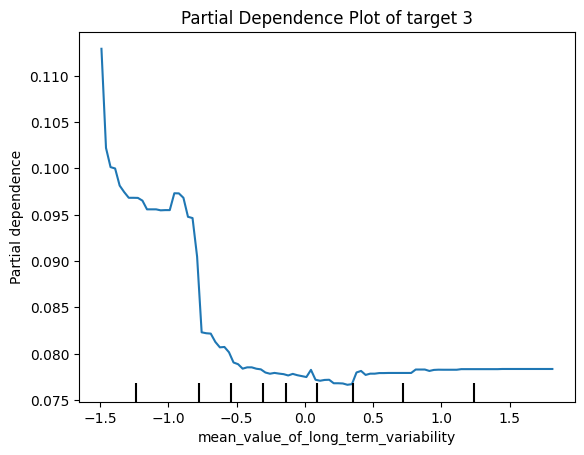

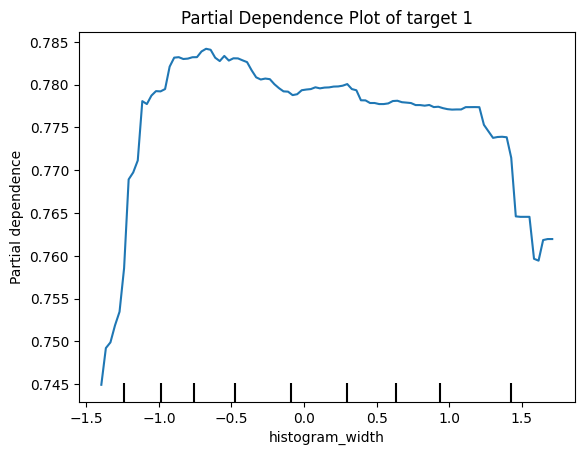

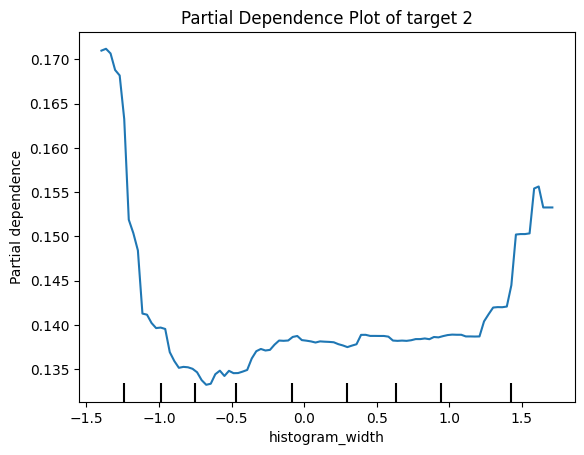

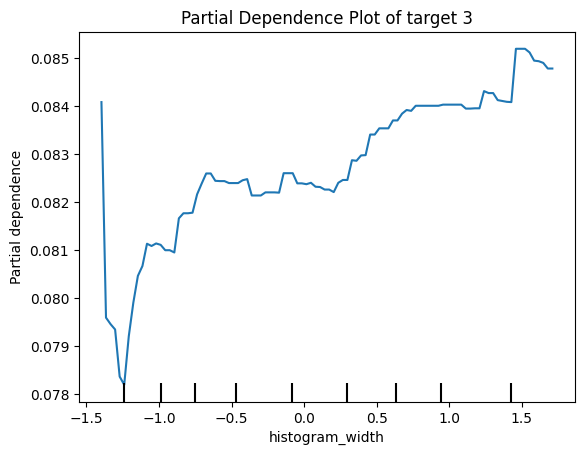

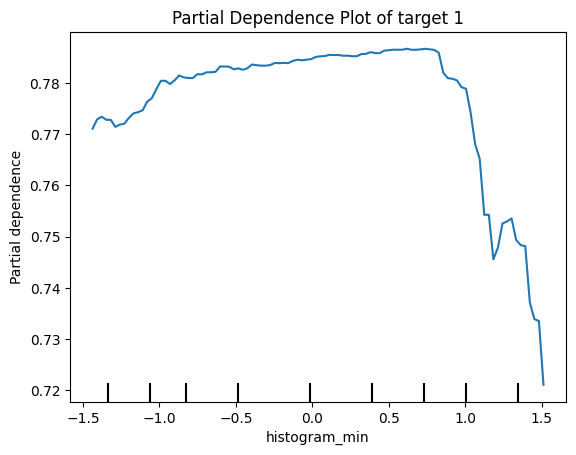

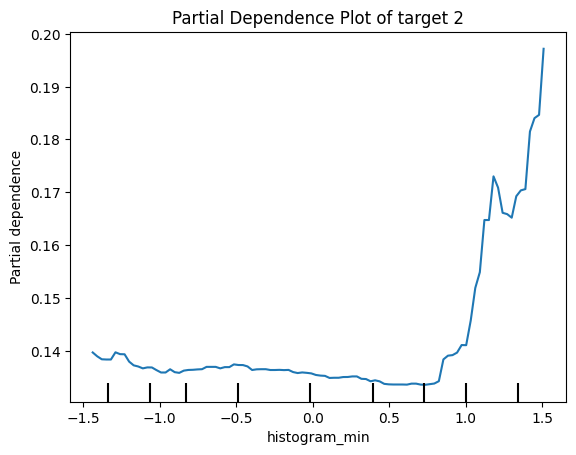

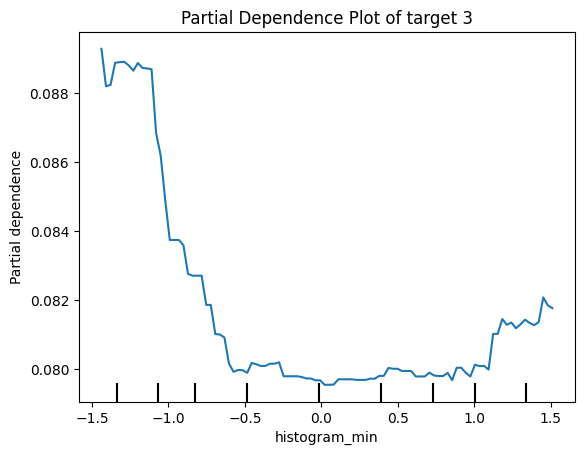

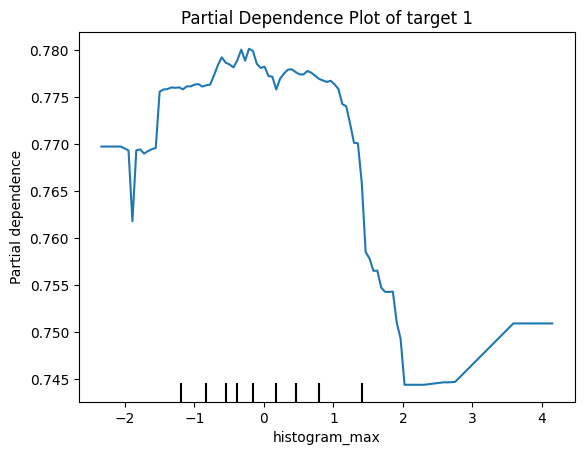

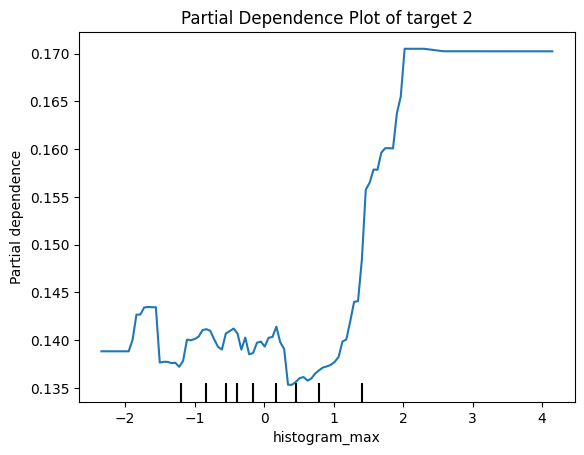

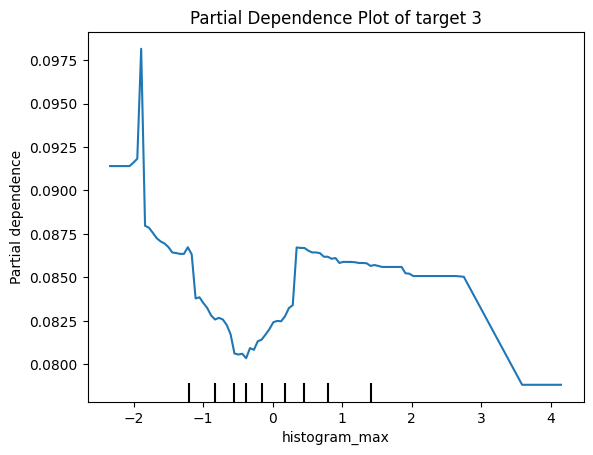

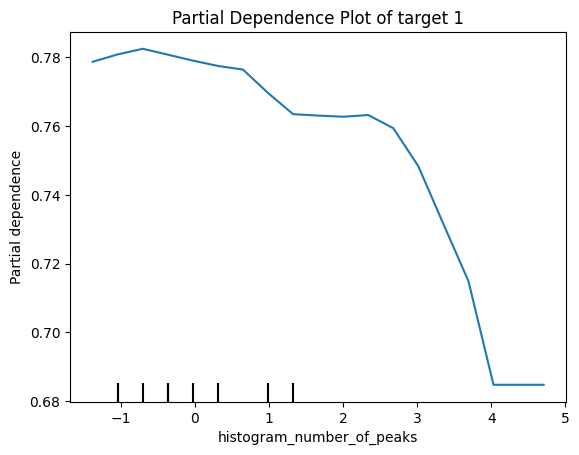

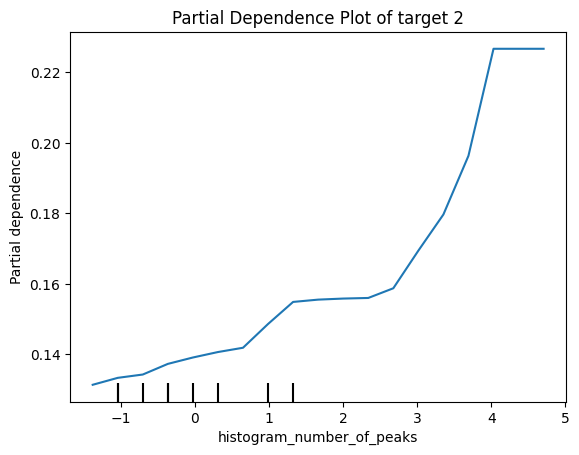

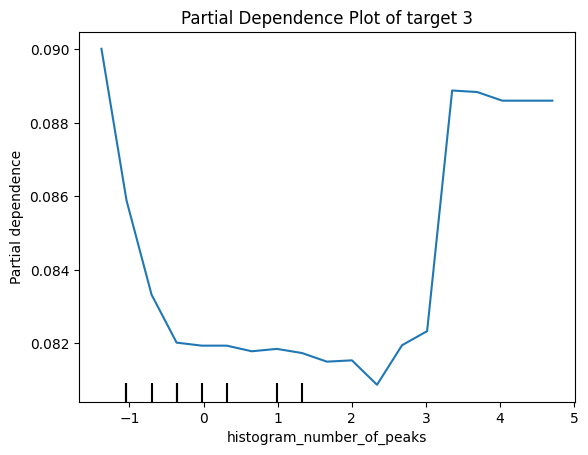

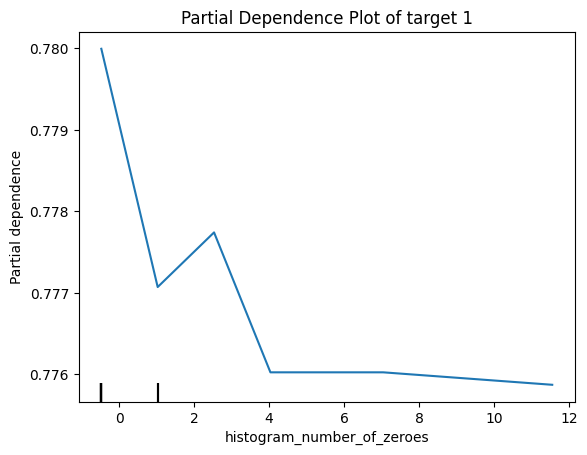

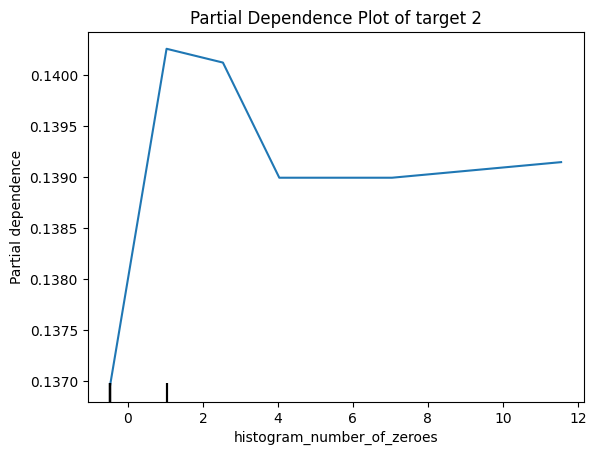

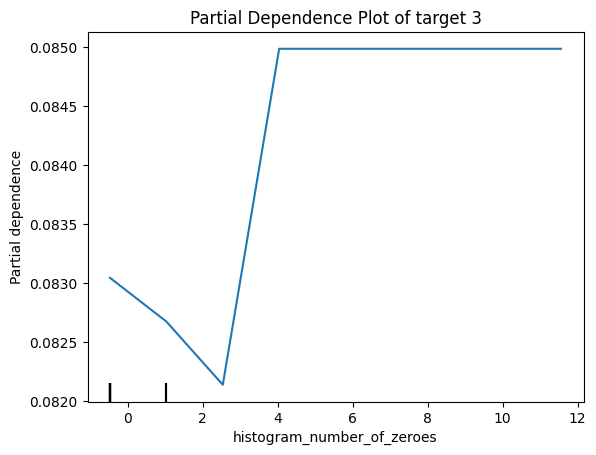

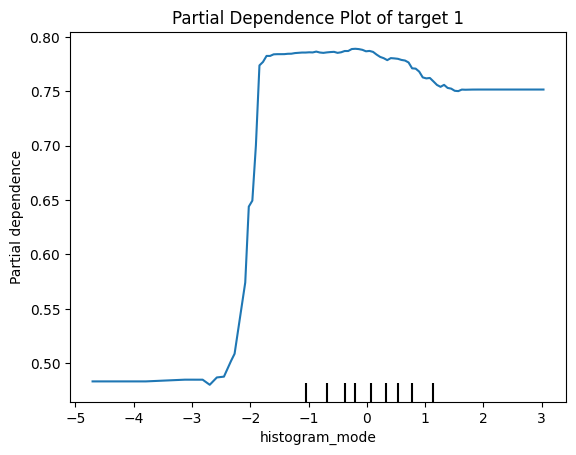

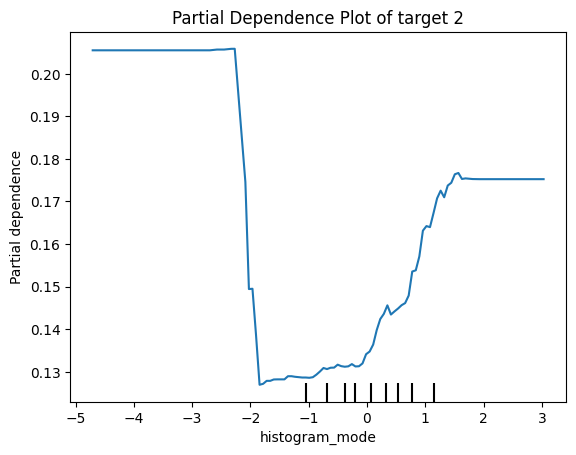

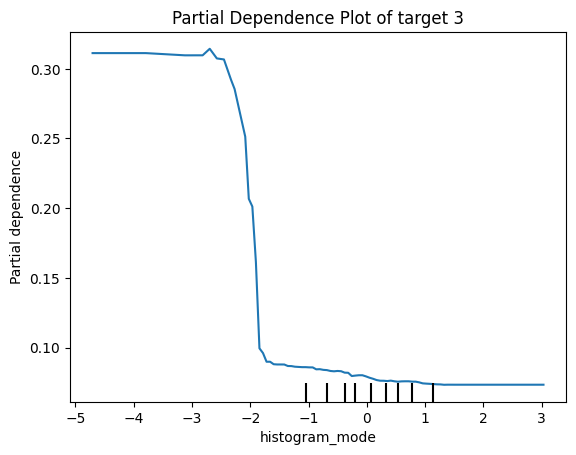

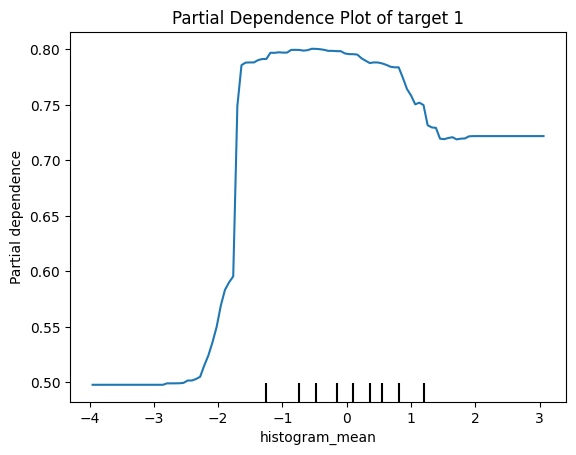

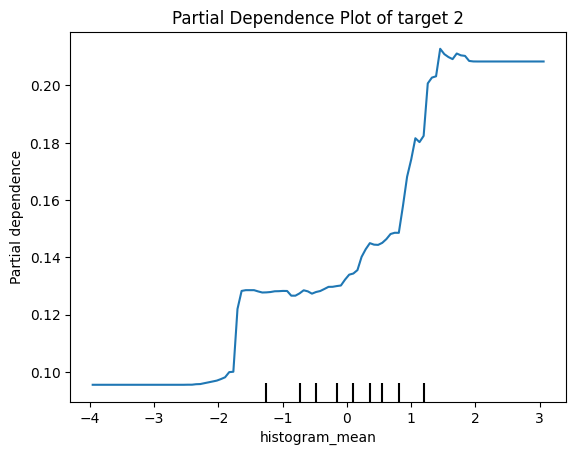

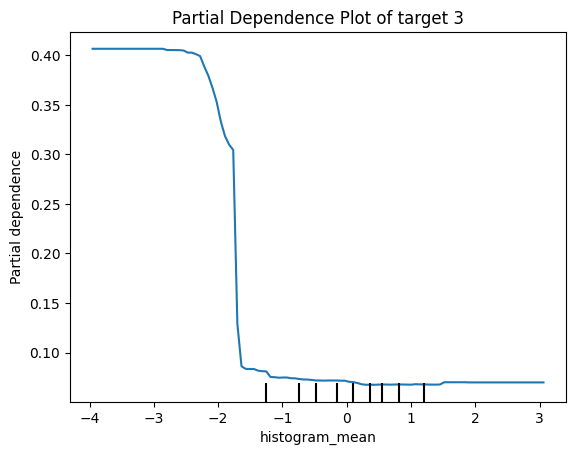

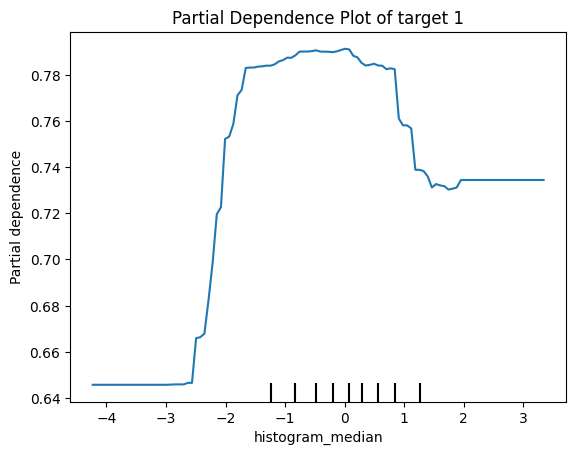

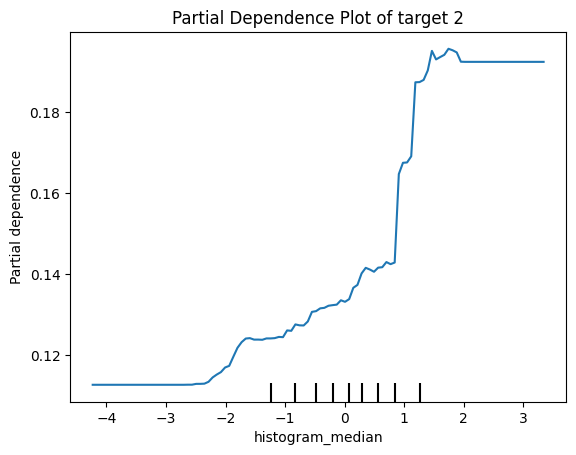

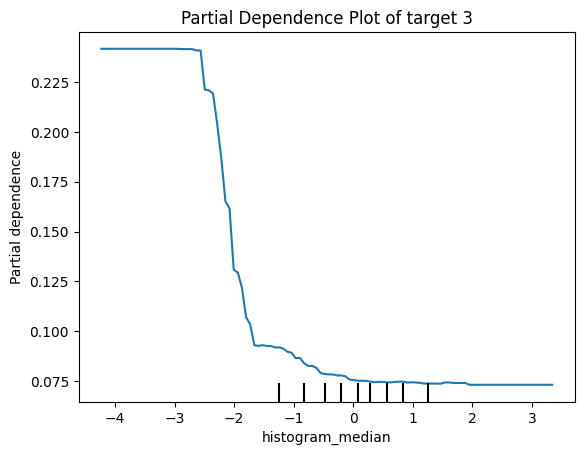

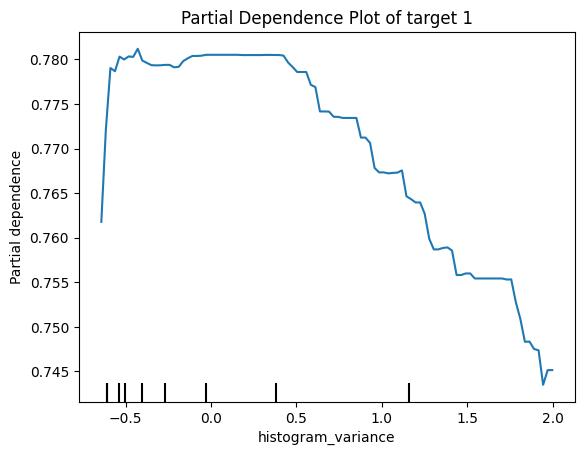

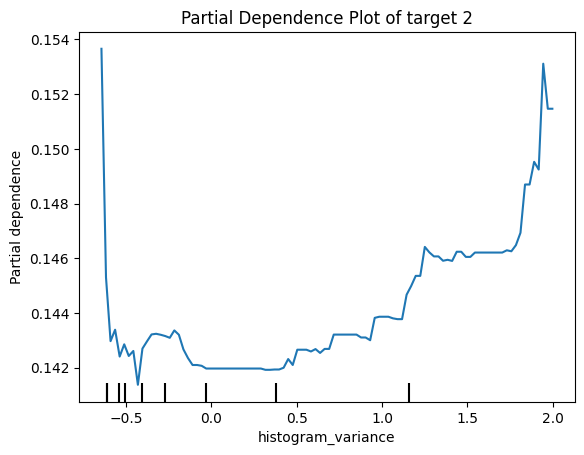

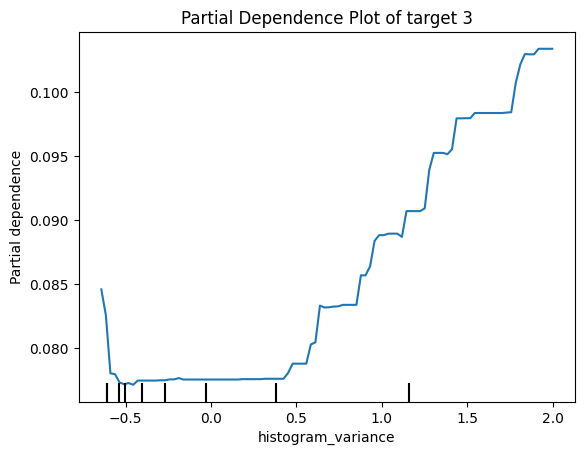

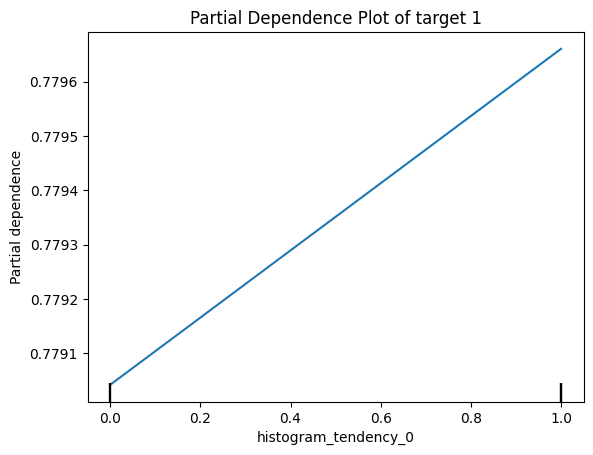

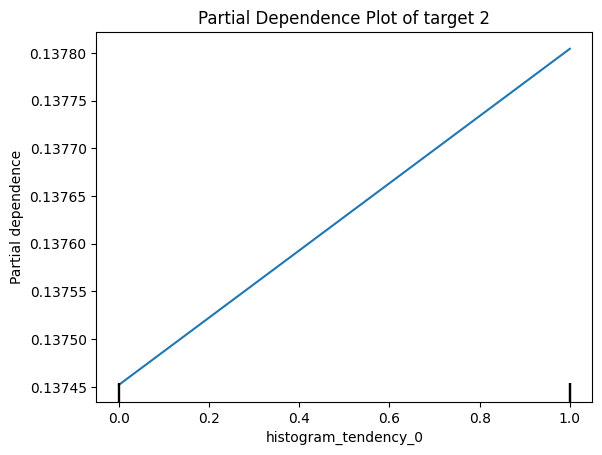

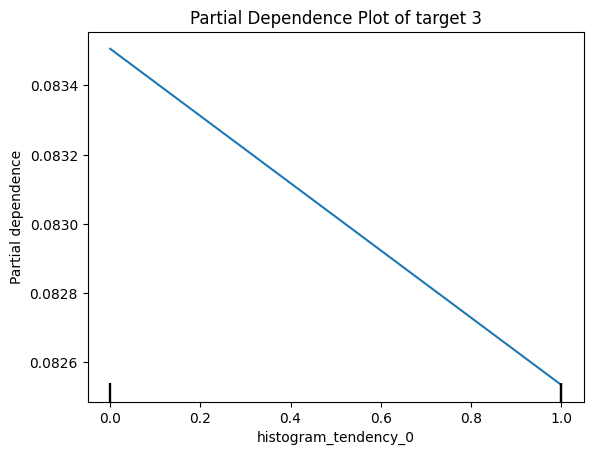

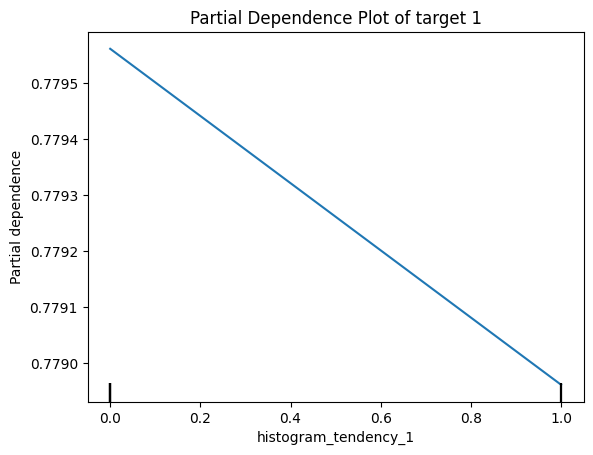

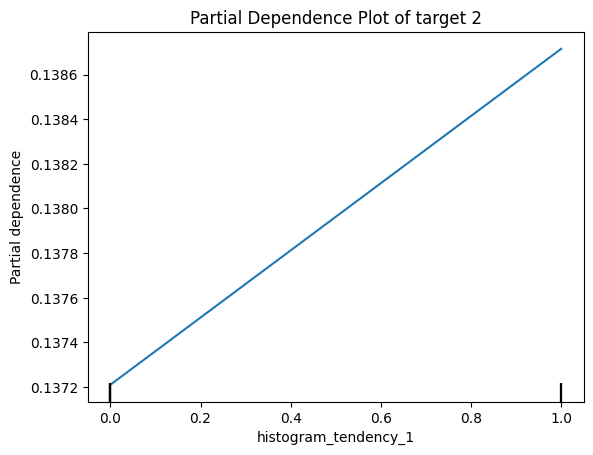

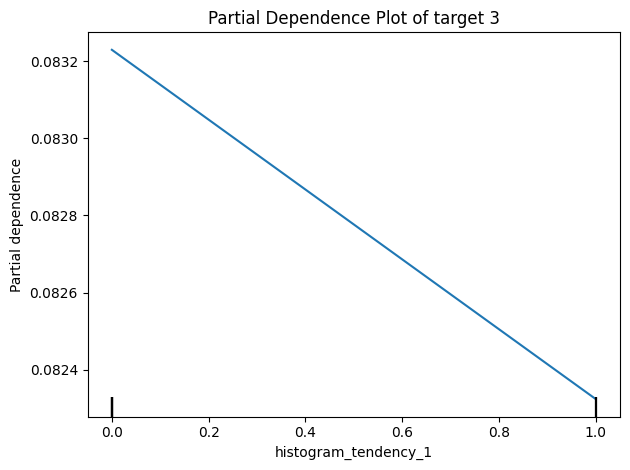

In [ ]:
features = range(0,21)

#fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for feature in features:
  for j in range(0,3):
    PartialDependenceDisplay.from_estimator(pipelines[3][0], X_train_scaled, [feature], target = j + 1)
    plt.title(f'Partial Dependence Plot of target {j+1}')
    plt.show()

Variable Importance Plot - Global Interpretation


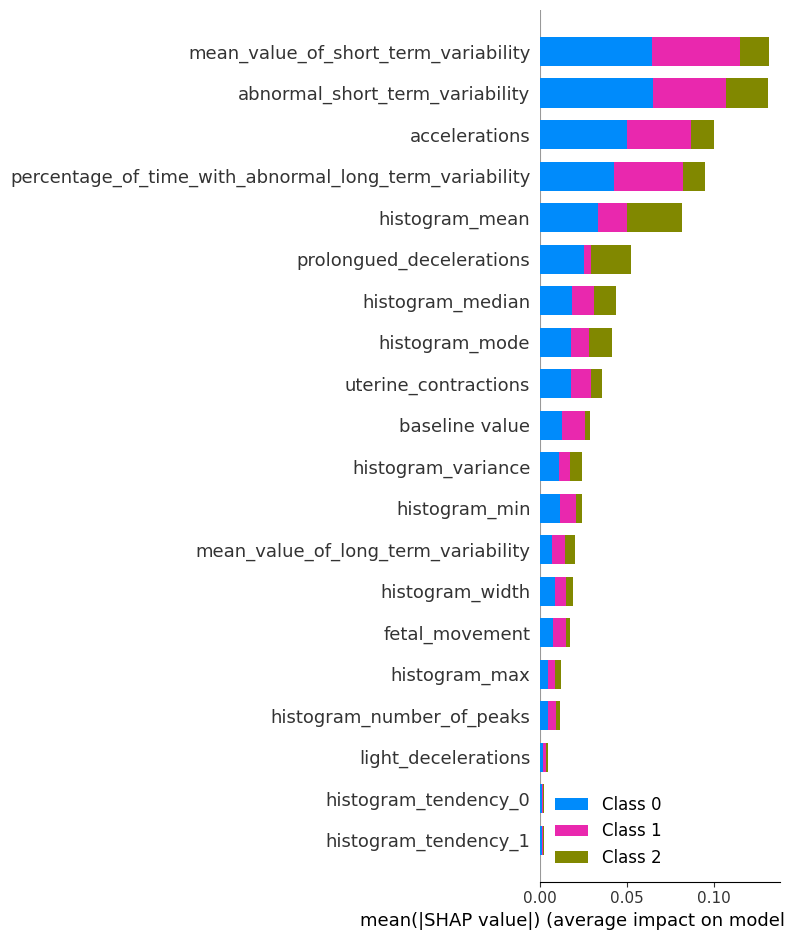

In [ ]:
#!pip install shap
import shap

# load JS visualization code to notebook
shap.initjs()
rf_model = pipelines[3][0]
# Create the explainer
explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(X_test_scaled)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test_scaled)
plt.show()

In [ ]:
'''
# Hyperparameter tuning for RF
parameters = {
    'n_estimators': [100,150, 200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8,12,14,16],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state = 42), param_grid=parameters, cv= 5)
CV_rfc.fit(X_train_scaled, y_train)

CV_rfc.best_params_
'''

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'sqrt',
 'n_estimators': 150,
 'n_jobs': -1}

In [ ]:
'''
RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_train_scaled, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test_scaled)
acccuracy= accuracy_score(y_test,predictions)
acccuracy
'''

0.9154929577464789

Accuracy without Hyperparameter tuning is high

#### As there is a class imbalance, we will try Balanced RF classifier

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

clf = BalancedRandomForestClassifier(
      sampling_strategy="all", replacement=True, random_state=42)
clf.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(random_state=42, replacement=True,
                               sampling_strategy='all')

In [ ]:
y_train_pred = clf.predict(X_train_scaled)
print(accuracy_score(y_train,y_train_pred))

0.9294117647058824


In [ ]:
y_test_pred = clf.predict(X_test_scaled)
print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

0.8896713615023474
              precision    recall  f1-score   support

           1       0.98      0.90      0.94       332
           2       0.61      0.83      0.71        59
           3       0.76      0.91      0.83        35

    accuracy                           0.89       426
   macro avg       0.78      0.88      0.82       426
weighted avg       0.91      0.89      0.90       426



Normal RF model gives more accuracy

### Applying SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train a classifier (Random Forest in this example) on the SMOTE-augmented training data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the original test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

           1       0.97      0.95      0.96       332
           2       0.72      0.78      0.75        59
           3       0.86      0.91      0.89        35

    accuracy                           0.92       426
   macro avg       0.85      0.88      0.87       426
weighted avg       0.93      0.92      0.92       426



In [ ]:
for pipe in pipelines:
    pipe.fit(X_train_smote, y_train_smote)

------------------------------------------------------
Logistic Regression: 0.898715 Train -
              precision    recall  f1-score   support

           1       0.95      0.89      0.92      1323
           2       0.85      0.88      0.87      1323
           3       0.90      0.93      0.92      1323

    accuracy                           0.90      3969
   macro avg       0.90      0.90      0.90      3969
weighted avg       0.90      0.90      0.90      3969

Logistic Regression: 0.866197 Test -
              precision    recall  f1-score   support

           1       0.98      0.89      0.93       332
           2       0.53      0.80      0.64        59
           3       0.73      0.77      0.75        35

    accuracy                           0.87       426
   macro avg       0.75      0.82      0.77       426
weighted avg       0.90      0.87      0.88       426



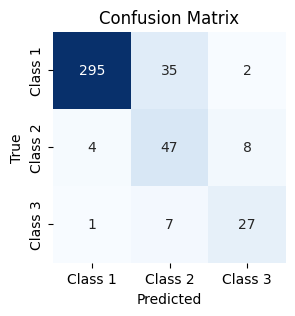

------------------------------------------------------
Decision Tree: 0.999748 Train -
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1323
           2       1.00      1.00      1.00      1323
           3       1.00      1.00      1.00      1323

    accuracy                           1.00      3969
   macro avg       1.00      1.00      1.00      3969
weighted avg       1.00      1.00      1.00      3969

Decision Tree: 0.884977 Test -
              precision    recall  f1-score   support

           1       0.95      0.93      0.94       332
           2       0.65      0.66      0.66        59
           3       0.73      0.86      0.79        35

    accuracy                           0.88       426
   macro avg       0.78      0.82      0.79       426
weighted avg       0.89      0.88      0.89       426



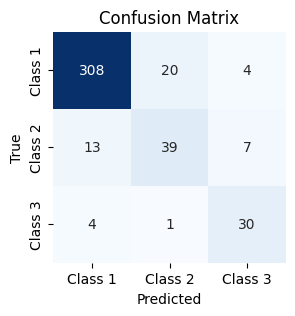

------------------------------------------------------
Gradient Boost: 0.991938 Train -
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1323
           2       0.98      0.99      0.99      1323
           3       1.00      1.00      1.00      1323

    accuracy                           0.99      3969
   macro avg       0.99      0.99      0.99      3969
weighted avg       0.99      0.99      0.99      3969

Gradient Boost: 0.741784 Test -
              precision    recall  f1-score   support

           1       0.99      0.70      0.82       332
           2       0.35      0.88      0.50        59
           3       0.73      0.94      0.83        35

    accuracy                           0.74       426
   macro avg       0.69      0.84      0.72       426
weighted avg       0.88      0.74      0.77       426



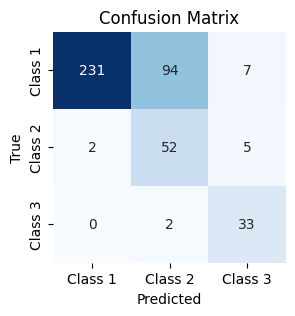

------------------------------------------------------
RandomForest: 0.999748 Train -
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1323
           2       1.00      1.00      1.00      1323
           3       1.00      1.00      1.00      1323

    accuracy                           1.00      3969
   macro avg       1.00      1.00      1.00      3969
weighted avg       1.00      1.00      1.00      3969

RandomForest: 0.922535 Test -
              precision    recall  f1-score   support

           1       0.97      0.95      0.96       332
           2       0.73      0.78      0.75        59
           3       0.86      0.91      0.89        35

    accuracy                           0.92       426
   macro avg       0.85      0.88      0.87       426
weighted avg       0.93      0.92      0.92       426



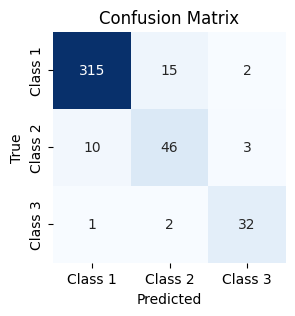

------------------------------------------------------
KNN: 0.973797 Train -
              precision    recall  f1-score   support

           1       1.00      0.93      0.96      1323
           2       0.94      0.99      0.96      1323
           3       0.99      1.00      0.99      1323

    accuracy                           0.97      3969
   macro avg       0.97      0.97      0.97      3969
weighted avg       0.97      0.97      0.97      3969

KNN: 0.866197 Test -
              precision    recall  f1-score   support

           1       0.96      0.90      0.93       332
           2       0.53      0.71      0.61        59
           3       0.78      0.80      0.79        35

    accuracy                           0.87       426
   macro avg       0.76      0.80      0.78       426
weighted avg       0.89      0.87      0.87       426



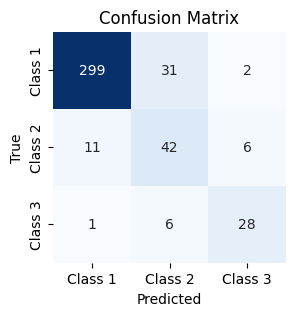

In [ ]:
for i, model in enumerate(pipelines):
  pred_test = model.predict(X_test_scaled)
  accuracy_test = accuracy_score(y_test, pred_test)
  pred_train = model.predict(X_train_smote)
  accuracy_train = accuracy_score(y_train_smote, pred_train)
  print(f"------------------------------------------------------")
  print("%s: %f Train -" % (pipe_dict[i], accuracy_train))
  print(classification_report(y_train_smote, pred_train))
  print("%s: %f Test -" % (pipe_dict[i], accuracy_test))
  print(classification_report(y_test, pred_test))

  cm = confusion_matrix(y_test,pred_test)
  plt.figure(figsize=(3, 3))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Class 1', 'Class 2', 'Class 3'],
              yticklabels=['Class 1', 'Class 2', 'Class 3'])
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()